In [10]:
# !wget https://raw.githubusercontent.com/mufaddalhamidofficial/tensorflow_course/main/helper_funcs.py
# !wget https://media.githubusercontent.com/media/mufaddalhamidofficial/skimlit_ai/main/data.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:02 --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:03 --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:03 --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:04 --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:05 --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:06 --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:08 --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:09 --:--:--     0
  0  127M    0  4113    0     0    421      0 87:52

In [11]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from helper_funcs import create_tensorboard_callback, create_checkpoint_callback, plot_loss_curves, compare_historys, unzip_data, calculate_results
import tensorflow_hub as hub
import io

In [12]:
tf.__version__

'2.13.0'

In [13]:
unzip_data("data.zip")
# !rm -rf data.zip

In [14]:
DIR_NAME_01 = "data/01_percent"
DIR_NAME_1 = "data/1_percent"
DIR_NAME_10 = "data/10_percent"
DIR_NAME_100 = "data/100_percent"

test_df_100 = pd.read_csv(DIR_NAME_100 + "/test.csv")
test_df_100 = test_df_100.iloc[:, 1:]

test_sentences_ = test_df_100.text.to_numpy()
test_labels_ = test_df_100.target.to_numpy()

## Callbacks:

In [15]:
def get_callbacks(experiment_name, use_early_stopping = True, patience=10, use_tensorboard = True, use_model_checkpoint = True):
    callbacks = [
    ]
    if use_tensorboard:
        callbacks.append(
            create_tensorboard_callback(
                dir_name="skim_lit/tensorboard",
                experiment_name=experiment_name,
            )
        )
    if use_model_checkpoint:
        callbacks.append(
            create_checkpoint_callback(
                dir_name="skim_lit/checkpoint",
                experiment_name=experiment_name,
                monitor="val_accuracy",
            )
        )
    if use_early_stopping:
        
        callbacks.append(tf.keras.callbacks.EarlyStopping(
            monitor="val_accuracy",
            patience=patience,
            restore_best_weights=True,
        ))
    return callbacks

# Modelling

## Model xs 0: Naive Bayes

### Get and Prepare data

In [7]:
train_data_01 = pd.read_csv(DIR_NAME_01 + "/train.csv")
train_sentences = train_data_01.text.to_numpy()
train_labels = train_data_01.target.to_numpy()

val_data_01 = pd.read_csv(DIR_NAME_01 + "/val.csv")
val_sentences = val_data_01.text.to_numpy()
val_labels = val_data_01.target.to_numpy()

test_sentences = test_sentences_.copy()
test_labels = test_labels_.copy()

### Label encode labels

In [8]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
train_labels_encoded = np.array(label_encoder.fit_transform(train_labels))
val_labels_encoded = np.array(label_encoder.transform(val_labels))
test_labels_encoded = np.array(label_encoder.transform(test_labels))

train_labels_encoded

array([0, 0, 2, ..., 2, 4, 1])

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

model_xs_0 = Pipeline(
    [
        ("tfidf", TfidfVectorizer()),
        ("clf", MultinomialNB()),
    ]
)

model_xs_0.fit(train_sentences, train_labels_encoded)

model_xs_0_val_preds = model_xs_0.predict(val_sentences)

model_xs_0_val_results = calculate_results(val_labels_encoded, model_xs_0_val_preds)
print(model_xs_0_val_results)

model_xs_0_preds = model_xs_0.predict(test_sentences)
model_xs_0_results = calculate_results(test_labels_encoded, model_xs_0_preds)
print(model_xs_0_results)

{'accuracy': 0.7428571428571429, 'precision': 0.6465934065934066, 'recall': 0.7428571428571429, 'f1': 0.6815675552517657}
{'accuracy': 0.6041772624012478, 'precision': 0.6697382380201429, 'recall': 0.6041772624012478, 'f1': 0.5256096033047748}


/Users/mufaddalhamid/Documents/Work/AI_Projects/.conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Model s 0: Naive Bayes

### Get and Prepare data

In [10]:
train_data_1 = pd.read_csv(DIR_NAME_1 + "/train.csv")
train_sentences = train_data_1.text.to_numpy()
train_labels = train_data_1.target.to_numpy()

val_data_1 = pd.read_csv(DIR_NAME_1 + "/val.csv")
val_sentences = val_data_1.text.to_numpy()
val_labels = val_data_1.target.to_numpy()

test_sentences = test_labels_.copy()
test_labels = test_labels_.copy()

### Label encode labels

In [11]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
train_labels_encoded = np.array(label_encoder.fit_transform(train_labels))
val_labels_encoded = np.array(label_encoder.transform(val_labels))
test_labels_encoded = np.array(label_encoder.transform(test_labels))

train_labels_encoded

array([0, 0, 2, ..., 4, 1, 1])

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

model_s_0 = Pipeline(
    [
        ("tfidf", TfidfVectorizer()),
        ("clf", MultinomialNB()),
    ]
)

model_s_0.fit(train_sentences, train_labels_encoded)

model_s_0_val_preds = model_s_0.predict(val_sentences)

model_s_0_val_results = calculate_results(val_labels_encoded, model_s_0_val_preds)
print(model_s_0_val_results)

model_s_0_preds = model_s_0.predict(test_sentences)
model_s_0_results = calculate_results(test_labels_encoded, model_s_0_preds)
print(model_s_0_results)

{'accuracy': 0.6727941176470589, 'precision': 0.7174763143444425, 'recall': 0.6727941176470589, 'f1': 0.6244466599453853}
{'accuracy': 0.480690333299427, 'precision': 0.26314056899182403, 'recall': 0.480690333299427, 'f1': 0.3321725221036744}


/Users/mufaddalhamid/Documents/Work/AI_Projects/.conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Model m 0: Naive Bayes

### Get and Prepare data

In [13]:
train_data_10 = pd.read_csv(DIR_NAME_10 + "/train.csv")
train_sentences = train_data_10.text.to_numpy()
train_labels = train_data_10.target.to_numpy()

val_data_10 = pd.read_csv(DIR_NAME_10 + "/val.csv")
val_sentences = val_data_10.text.to_numpy()
val_labels = val_data_10.target.to_numpy()

test_sentences = test_labels_.copy()
test_labels = test_labels_.copy()

### Label encode labels

In [14]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
train_labels_encoded = np.array(label_encoder.fit_transform(train_labels))
val_labels_encoded = np.array(label_encoder.transform(val_labels))
test_labels_encoded = np.array(label_encoder.transform(test_labels))

train_labels_encoded

array([0, 0, 2, ..., 4, 1, 1])

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

model_m_0 = Pipeline(
    [
        ("tfidf", TfidfVectorizer()),
        ("clf", MultinomialNB()),
    ]
)

model_m_0.fit(train_sentences, train_labels_encoded)

model_m_0_val_preds = model_m_0.predict(val_sentences)

model_m_0_val_results = calculate_results(val_labels_encoded, model_m_0_val_preds)
print(model_m_0_val_results)

model_m_0_preds = model_m_0.predict(test_sentences)
model_m_0_results = calculate_results(test_labels_encoded, model_m_0_preds)
print(model_m_0_results)

{'accuracy': 0.7317073170731707, 'precision': 0.7245741391302374, 'recall': 0.7317073170731707, 'f1': 0.7098959600467819}
{'accuracy': 0.4112162207981555, 'precision': 0.34029280709409787, 'recall': 0.4112162207981555, 'f1': 0.37149398945494905}


/Users/mufaddalhamid/Documents/Work/AI_Projects/.conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Model L 0: Naive Bayes

### Get and Prepare data

In [16]:
train_data_100 = pd.read_csv(DIR_NAME_100 + "/train.csv")
train_sentences = train_data_100.text.to_numpy()
train_labels = train_data_100.target.to_numpy()

val_data_100 = pd.read_csv(DIR_NAME_100 + "/val.csv")
val_sentences = val_data_100.text.to_numpy()
val_labels = val_data_100.target.to_numpy()

test_sentences = test_labels_.copy()
test_labels = test_labels_.copy()

### Label encode labels

In [17]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
train_labels_encoded = np.array(label_encoder.fit_transform(train_labels))
val_labels_encoded = np.array(label_encoder.transform(val_labels))
test_labels_encoded = np.array(label_encoder.transform(test_labels))

train_labels_encoded

array([0, 0, 2, ..., 4, 4, 4])

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

model_l_0 = Pipeline(
    [
        ("tfidf", TfidfVectorizer()),
        ("clf", MultinomialNB()),
    ]
)

model_l_0.fit(train_sentences, train_labels_encoded)

model_l_0_val_preds = model_l_0.predict(val_sentences)

model_l_0_val_results = calculate_results(val_labels_encoded, model_l_0_val_preds)
print(model_l_0_val_results)

model_l_0_preds = model_l_0.predict(test_sentences)
model_l_0_results = calculate_results(test_labels_encoded, model_l_0_preds)
print(model_l_0_results)

{'accuracy': 0.7497580533665146, 'precision': 0.7431966265737352, 'recall': 0.7497580533665146, 'f1': 0.7389570175489825}
{'accuracy': 0.5612857288170074, 'precision': 0.38547085378784285, 'recall': 0.5612857288170074, 'f1': 0.44094271828090453}


/Users/mufaddalhamid/Documents/Work/AI_Projects/.conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Model s Data Preps:

### Get and Prepare data

In [16]:
train_data_1 = pd.read_csv(DIR_NAME_1 + "/train.csv")
train_sentences = train_data_1.text.to_numpy()
train_labels = train_data_1.target.to_numpy()

val_data_1 = pd.read_csv(DIR_NAME_1 + "/val.csv")
val_sentences = val_data_1.text.to_numpy()
val_labels = val_data_1.target.to_numpy()

test_sentences = test_sentences_.copy()
test_labels = test_labels_.copy()

### One hot encode labels

In [17]:
from sklearn.preprocessing import OneHotEncoder

one_hot_encoder = OneHotEncoder(sparse_output=False)
train_labels_one_hot = one_hot_encoder.fit_transform(train_labels.reshape(-1, 1))
val_labels_one_hot = one_hot_encoder.transform(val_labels.reshape(-1, 1))
test_labels_one_hot = one_hot_encoder.transform(test_labels.reshape(-1, 1))

train_labels_one_hot

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [40]:
class_names = list(one_hot_encoder.categories_[0])
classes_count = len(class_names) # type: ignore
class_names 

['BACKGROUND', 'CONCLUSIONS', 'METHODS', 'OBJECTIVE', 'RESULTS']

In [19]:
import string

train_chars = [" ".join(list(sentence)) for sentence in train_sentences]
val_chars = [" ".join(list(sentence)) for sentence in val_sentences]
test_chars = [" ".join(list(sentence)) for sentence in test_sentences]

char_lens = [len(sentence.split(' ')) for sentence in train_chars]

seq_char_len = int(np.percentile(char_lens, 90))

alphabet = string.ascii_lowercase + string.digits + string.punctuation

NUM_CHAR_TOKENS = len(alphabet) + 2
seq_char_len, NUM_CHAR_TOKENS, alphabet

(286,
 70,
 'abcdefghijklmnopqrstuvwxyz0123456789!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~')

## Model s 1

In [23]:
train_dataset = tf.data.Dataset.from_tensor_slices((train_sentences, train_labels_one_hot))
val_dataset = tf.data.Dataset.from_tensor_slices((val_sentences, val_labels_one_hot))
test_dataset = tf.data.Dataset.from_tensor_slices((test_sentences, test_labels_one_hot))

train_dataset = train_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
val_dataset = val_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

2024-02-04 03:05:51.051910: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2024-02-04 03:05:51.051958: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2024-02-04 03:05:51.051971: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2024-02-04 03:05:51.052011: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-02-04 03:05:51.052029: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


2024-02-04 03:05:51.169049: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


Saving TensorBoard log files to: skim_lit/tensorboard/model_s_1/20240204-030551
Saving model checkpoints to: skim_lit/checkpoint/model_s_1/checkpoint.ckpt
Epoch 1/10
691/691 [==============================] - 15s 21ms/step - loss: 0.8390 - accuracy: 0.6771 - val_loss: 0.6978 - val_accuracy: 0.7206
Epoch 2/10
691/691 [==============================] - 13s 19ms/step - loss: 0.4897 - accuracy: 0.8252 - val_loss: 0.6976 - val_accuracy: 0.7390
Epoch 3/10
691/691 [==============================] - 14s 20ms/step - loss: 0.3395 - accuracy: 0.8863 - val_loss: 0.7737 - val_accuracy: 0.7279
Epoch 4/10
691/691 [==============================] - 13s 19ms/step - loss: 0.2206 - accuracy: 0.9321 - val_loss: 0.9176 - val_accuracy: 0.7206
Epoch 5/10
691/691 [==============================] - 13s 19ms/step - loss: 0.1425 - accuracy: 0.9585 - val_loss: 1.0661 - val_accuracy: 0.7206
Epoch 6/10
691/691 [==============================] - 13s 19ms/step - loss: 0.0971 - accuracy: 0.9746 - val_loss: 1.2316 - va

{'accuracy': 0.7708947885939036,
 'precision': 0.7656473943186943,
 'recall': 0.7708947885939036,
 'f1': 0.7640681396109397}

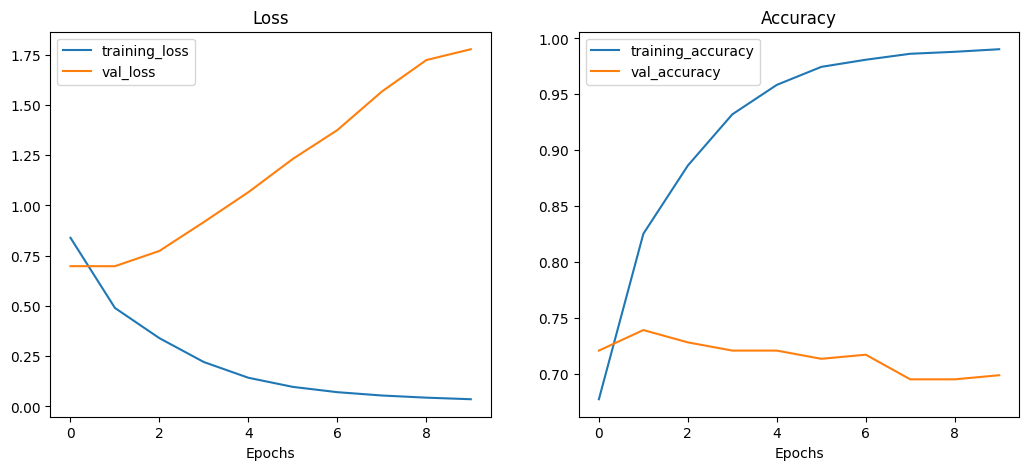

In [24]:
text_vectorizer = tf.keras.layers.TextVectorization(
    max_tokens=68000,
    output_sequence_length=50,
)

text_vectorizer.adapt(train_sentences)

embedding = tf.keras.layers.Embedding(
    input_dim=len(text_vectorizer.get_vocabulary()),
    output_dim=128,
    mask_zero=True,
)

inputs = tf.keras.layers.Input(shape=(1,), dtype=tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
x = tf.keras.layers.Conv1D(64, 5, activation='relu', padding="same")(x)
x = tf.keras.layers.GlobalAveragePooling1D()(x)
outputs = tf.keras.layers.Dense(classes_count, activation="softmax")(x)

model_s_1 = tf.keras.Model(inputs, outputs) # type: ignore

model_s_1.compile(
    loss="categorical_crossentropy",
    optimizer=tf.keras.optimizers.legacy.Adam(),
    metrics=["accuracy"],
)

model_s_1_history = model_s_1.fit(
    train_dataset,
    epochs=10,
    steps_per_epoch=int(len(train_dataset)),
    validation_data=val_dataset,
    validation_steps=int(len(val_dataset)),
    callbacks=get_callbacks("model_s_1"),
)

model_s_1.load_weights("skim_lit/checkpoint/model_s_1/checkpoint.ckpt")

model_s_1_val_preds = tf.argmax(model_s_1.predict(val_sentences), axis=1)
model_s_1_val_results = calculate_results(tf.argmax(val_labels_one_hot, axis=1), model_s_1_val_preds)
print(model_s_1_val_results)

plot_loss_curves(model_s_1_history)

model_s_1_preds = tf.argmax(model_s_1.predict(test_sentences), axis=1)
model_s_1_results = calculate_results(tf.argmax(test_labels_one_hot, axis=1), model_s_1_preds)
model_s_1_results

## Model s 2

Saving TensorBoard log files to: skim_lit/tensorboard/model_s_2/20240204-030813
Saving model checkpoints to: skim_lit/checkpoint/model_s_2/checkpoint.ckpt
Epoch 1/10
691/691 [==============================] - 46s 64ms/step - loss: 0.8475 - accuracy: 0.6777 - val_loss: 0.7674 - val_accuracy: 0.6838
Epoch 2/10
691/691 [==============================] - 36s 52ms/step - loss: 0.7377 - accuracy: 0.7183 - val_loss: 0.7614 - val_accuracy: 0.6765
Epoch 3/10
691/691 [==============================] - 33s 47ms/step - loss: 0.7256 - accuracy: 0.7234 - val_loss: 0.7584 - val_accuracy: 0.6801
Epoch 4/10
691/691 [==============================] - 32s 46ms/step - loss: 0.7193 - accuracy: 0.7255 - val_loss: 0.7563 - val_accuracy: 0.6801
Epoch 5/10
691/691 [==============================] - 34s 49ms/step - loss: 0.7152 - accuracy: 0.7277 - val_loss: 0.7533 - val_accuracy: 0.6875
Epoch 6/10
691/691 [==============================] - 31s 45ms/step - loss: 0.7122 - accuracy: 0.7293 - val_loss: 0.7517 - va

{'accuracy': 0.7153900925643373,
 'precision': 0.7087481322151679,
 'recall': 0.7153900925643373,
 'f1': 0.7087003100957218}

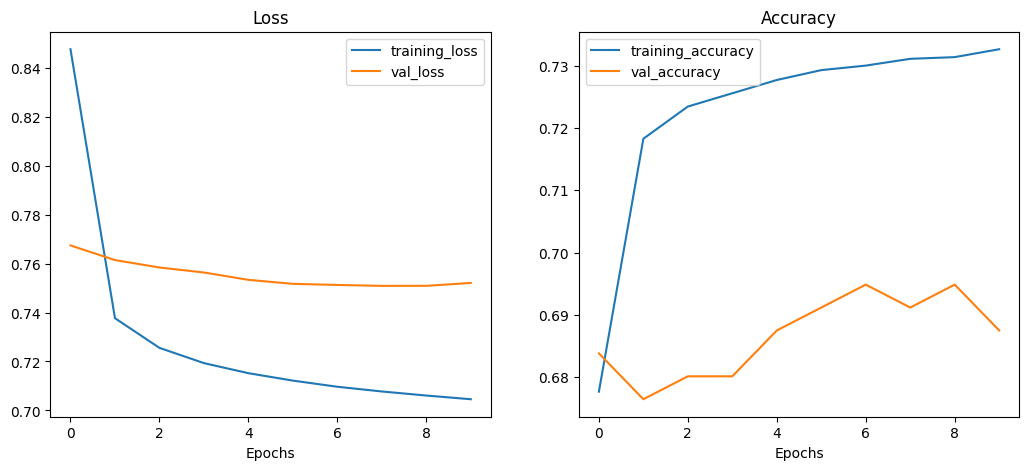

In [25]:
hub_embedding = hub.KerasLayer(
    "https://www.kaggle.com/models/google/universal-sentence-encoder/frameworks/TensorFlow2/variations/universal-sentence-encoder/versions/2",
    trainable=False,
    name="universal_sentence_encoder",
)

inputs = tf.keras.layers.Input(shape=[], dtype=tf.string)
x = hub_embedding(inputs)
x = tf.keras.layers.Dense(128, activation="relu")(x)
outputs = tf.keras.layers.Dense(classes_count, activation="softmax")(x)

model_s_2 = tf.keras.Model(inputs, outputs)

model_s_2.compile(
    loss="categorical_crossentropy",
    optimizer=tf.keras.optimizers.legacy.Adam(),
    metrics=["accuracy"],
)

model_s_2_history = model_s_2.fit(
    train_dataset,
    epochs=10,
    steps_per_epoch=len(train_dataset),
    validation_data=val_dataset,
    validation_steps=len(val_dataset),
    callbacks=get_callbacks("model_s_2"),
)

model_s_2.load_weights("skim_lit/checkpoint/model_s_2/checkpoint.ckpt")

model_s_2_val_preds = tf.argmax(model_s_2.predict(val_sentences), axis=1)
model_s_2_val_results = calculate_results(tf.argmax(val_labels_one_hot, axis=1), model_s_2_val_preds)
print(model_s_2_val_results)

plot_loss_curves(model_s_2_history)

model_s_2_preds = tf.argmax(model_s_2.predict(test_sentences), axis=1)
model_s_2_results = calculate_results(tf.argmax(test_labels_one_hot, axis=1), model_s_2_preds)
model_s_2_results

## Model s 3

In [26]:
train_char_dataset = tf.data.Dataset.from_tensor_slices((train_chars, train_labels_one_hot)).batch(32).prefetch(tf.data.AUTOTUNE)
val_char_dataset = tf.data.Dataset.from_tensor_slices((val_chars, val_labels_one_hot)).batch(32).prefetch(tf.data.AUTOTUNE)
test_char_dataset = tf.data.Dataset.from_tensor_slices((test_chars, test_labels_one_hot)).batch(32).prefetch(tf.data.AUTOTUNE)

Saving TensorBoard log files to: skim_lit/tensorboard/model_s_3/20240204-031446
Saving model checkpoints to: skim_lit/checkpoint/model_s_3/checkpoint.ckpt
Epoch 1/10
691/691 [==============================] - 23s 31ms/step - loss: 1.1684 - accuracy: 0.5329 - val_loss: 0.9606 - val_accuracy: 0.6287
Epoch 2/10
691/691 [==============================] - 21s 30ms/step - loss: 0.9112 - accuracy: 0.6504 - val_loss: 0.8861 - val_accuracy: 0.6691
Epoch 3/10
691/691 [==============================] - 19s 27ms/step - loss: 0.8382 - accuracy: 0.6809 - val_loss: 0.8442 - val_accuracy: 0.7022
Epoch 4/10
691/691 [==============================] - 19s 28ms/step - loss: 0.7941 - accuracy: 0.6968 - val_loss: 0.8329 - val_accuracy: 0.7059
Epoch 5/10
691/691 [==============================] - 19s 27ms/step - loss: 0.7625 - accuracy: 0.7117 - val_loss: 0.8310 - val_accuracy: 0.6985
Epoch 6/10
691/691 [==============================] - 19s 27ms/step - loss: 0.7378 - accuracy: 0.7215 - val_loss: 0.8293 - va

{'accuracy': 0.6797545180212253,
 'precision': 0.6728896524251453,
 'recall': 0.6797545180212253,
 'f1': 0.6599535129282769}

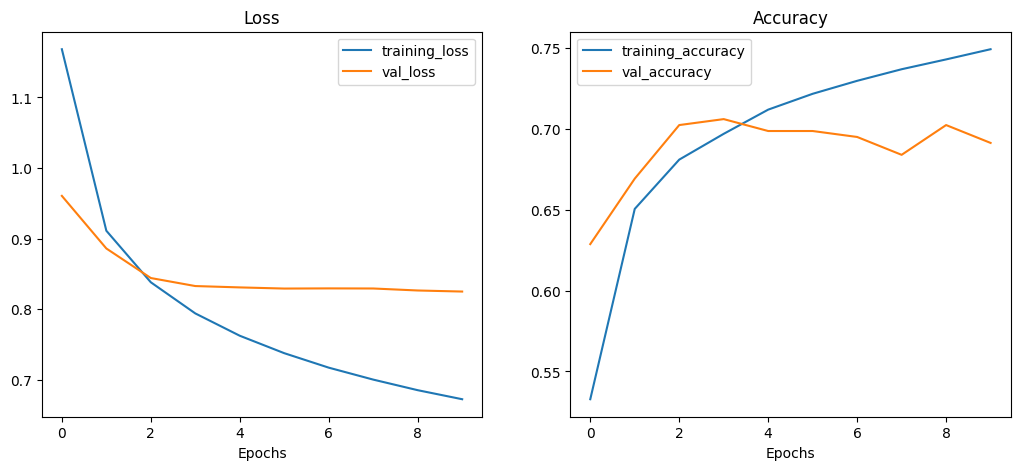

In [27]:
char_vectorizer = tf.keras.layers.TextVectorization(
    max_tokens=NUM_CHAR_TOKENS,
    output_sequence_length=seq_char_len,
)

char_vectorizer.adapt(train_chars)

char_embedding = tf.keras.layers.Embedding(
    input_dim=len(char_vectorizer.get_vocabulary()),
    output_dim=25,
    mask_zero=True,
)

inputs = tf.keras.layers.Input(shape=(1,), dtype=tf.string)
x = char_vectorizer(inputs)
x = char_embedding(x)
x = tf.keras.layers.Conv1D(64, 5, activation="relu")(x)
x = tf.keras.layers.GlobalMaxPooling1D()(x)
outputs = tf.keras.layers.Dense(classes_count, activation="softmax")(x)

model_s_3 = tf.keras.Model(inputs, outputs)

model_s_3.compile(
    loss="categorical_crossentropy",
    optimizer=tf.keras.optimizers.legacy.Adam(),
    metrics=["accuracy"],
)

model_s_3_history = model_s_3.fit(
    train_char_dataset,
    epochs=10,
    steps_per_epoch=int(len(train_char_dataset)),
    validation_data=val_char_dataset,
    validation_steps=int(len(val_char_dataset)),
    callbacks=get_callbacks("model_s_3"),
)

model_s_3.load_weights("skim_lit/checkpoint/model_s_3/checkpoint.ckpt")

model_s_3_val_preds = tf.argmax(model_s_3.predict(val_chars), axis=1)
model_s_3_val_results = calculate_results(tf.argmax(val_labels_one_hot, axis=1), model_s_3_val_preds)
print(model_s_3_val_results)

plot_loss_curves(model_s_3_history)

model_s_3_preds = tf.argmax(model_s_3.predict(test_chars), axis=1)
model_s_3_results = calculate_results(tf.argmax(test_labels_one_hot, axis=1), model_s_3_preds)
model_s_3_results

## Model s 4

In [28]:
train_word_char_data = tf.data.Dataset.from_tensor_slices((train_sentences, train_chars))
train_word_char_labels = tf.data.Dataset.from_tensor_slices(train_labels_one_hot)
train_word_char_dataset = tf.data.Dataset.zip((train_word_char_data, train_word_char_labels)).batch(32).prefetch(tf.data.AUTOTUNE)

val_word_char_data = tf.data.Dataset.from_tensor_slices((val_sentences, val_chars))
val_word_char_labels = tf.data.Dataset.from_tensor_slices(val_labels_one_hot)
val_word_char_dataset = tf.data.Dataset.zip((val_word_char_data, val_word_char_labels)).batch(32).prefetch(tf.data.AUTOTUNE)

test_word_char_data = tf.data.Dataset.from_tensor_slices((test_sentences, test_chars))
test_word_char_labels = tf.data.Dataset.from_tensor_slices(test_labels_one_hot)
test_word_char_dataset = tf.data.Dataset.zip((test_word_char_data, test_word_char_labels)).batch(32).prefetch(tf.data.AUTOTUNE)

Saving TensorBoard log files to: skim_lit/tensorboard/model_s_4/20240204-031823
Saving model checkpoints to: skim_lit/checkpoint/model_s_4/checkpoint.ckpt
Epoch 1/10


2024-02-04 03:18:27.583130: W tensorflow/core/common_runtime/type_inference.cc:339] Type inference failed. This indicates an invalid graph that escaped type checking. Error message: INVALID_ARGUMENT: expected compatible input types, but input 1:
type_id: TFT_OPTIONAL
args {
  type_id: TFT_PRODUCT
  args {
    type_id: TFT_TENSOR
    args {
      type_id: TFT_INT32
    }
  }
}
 is neither a subtype nor a supertype of the combined inputs preceding it:
type_id: TFT_OPTIONAL
args {
  type_id: TFT_PRODUCT
  args {
    type_id: TFT_TENSOR
    args {
      type_id: TFT_FLOAT
    }
  }
}

	for Tuple type infernce function 0
	while inferring type of node 'cond_36/output/_23'


691/691 [==============================] - 592s 846ms/step - loss: 0.8781 - accuracy: 0.6583 - val_loss: 0.7712 - val_accuracy: 0.6801
Epoch 2/10
691/691 [==============================] - 576s 835ms/step - loss: 0.7363 - accuracy: 0.7207 - val_loss: 0.7662 - val_accuracy: 0.6875
Epoch 3/10
691/691 [==============================] - 609s 882ms/step - loss: 0.7076 - accuracy: 0.7322 - val_loss: 0.7659 - val_accuracy: 0.7022
Epoch 4/10
691/691 [==============================] - 606s 877ms/step - loss: 0.6949 - accuracy: 0.7406 - val_loss: 0.7674 - val_accuracy: 0.6985
Epoch 5/10
691/691 [==============================] - 612s 886ms/step - loss: 0.6922 - accuracy: 0.7418 - val_loss: 0.7683 - val_accuracy: 0.6875
Epoch 6/10
691/691 [==============================] - 614s 890ms/step - loss: 0.7021 - accuracy: 0.7394 - val_loss: 0.7843 - val_accuracy: 0.6949
Epoch 7/10
691/691 [==============================] - 597s 864ms/step - loss: 0.7249 - accuracy: 0.7325 - val_loss: 0.8321 - val_accura

{'accuracy': 0.7121350829010273,
 'precision': 0.7042331923084236,
 'recall': 0.7121350829010273,
 'f1': 0.7047602188809451}

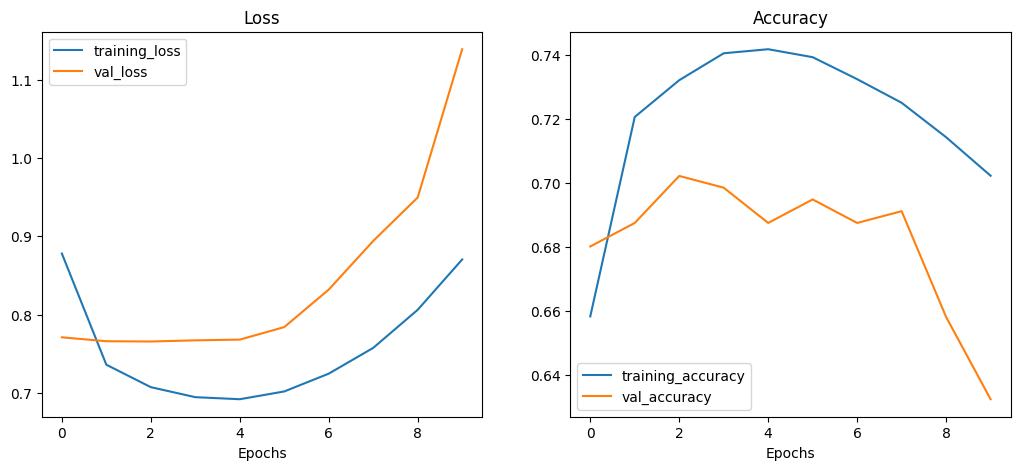

In [29]:
hub_embedding = hub.KerasLayer(
    "https://www.kaggle.com/models/google/universal-sentence-encoder/frameworks/TensorFlow2/variations/universal-sentence-encoder/versions/2",
    trainable=False,
    name="universal_sentence_encoder",
)

char_vectorizer = tf.keras.layers.TextVectorization(
    max_tokens=NUM_CHAR_TOKENS,
    output_sequence_length=seq_char_len,
)

char_vectorizer.adapt(train_chars)

char_embedding = tf.keras.layers.Embedding(
    input_dim=len(char_vectorizer.get_vocabulary()),
    output_dim=25,
    mask_zero=True,
)


word_input = tf.keras.layers.Input(shape=[], dtype=tf.string)
word_embed = hub_embedding(word_input)
word_output = tf.keras.layers.Dense(128, activation="relu")(word_embed)
word_model = tf.keras.Model(word_input, word_output)

char_input = tf.keras.layers.Input(shape=(1,), dtype=tf.string)
char_embed = char_vectorizer(char_input)
char_embed = char_embedding(char_embed)
char_bi_lstm = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(24))(char_embed)
char_model = tf.keras.Model(char_input, char_bi_lstm)

word_char_concat = tf.keras.layers.Concatenate(name="word_char_hybrid")([word_model.output, char_model.output])

combined_dropout = tf.keras.layers.Dropout(0.5)(word_char_concat)
combined_dense = tf.keras.layers.Dense(128, activation="relu")(combined_dropout)
final_dropout = tf.keras.layers.Dropout(0.5)(combined_dense)
output_layer = tf.keras.layers.Dense(classes_count, activation="softmax")(final_dropout)

model_s_4 = tf.keras.Model([word_model.input, char_model.input], output_layer)

model_s_4.compile(
    loss="categorical_crossentropy",
    optimizer=tf.keras.optimizers.legacy.Adam(),
    metrics=["accuracy"],
)

model_s_4_history = model_s_4.fit(
    train_word_char_dataset,
    epochs=10,
    steps_per_epoch=int(len(train_word_char_dataset)),
    validation_data=val_word_char_dataset,
    validation_steps=int(len(val_word_char_dataset)),
    callbacks=get_callbacks("model_s_4"),
)

model_s_4.load_weights("skim_lit/checkpoint/model_s_4/checkpoint.ckpt")

model_s_4_val_preds = tf.argmax(model_s_4.predict(val_word_char_dataset), axis=1)
model_s_4_val_results = calculate_results(tf.argmax(val_labels_one_hot, axis=1), model_s_4_val_preds)
print(model_s_4_val_results)

plot_loss_curves(model_s_4_history)

model_s_4_preds = tf.argmax(model_s_4.predict(test_word_char_dataset), axis=1)
model_s_4_results = calculate_results(tf.argmax(test_labels_one_hot, axis=1), model_s_4_preds)
model_s_4_results

## Model s 5

In [30]:
train_line_numbers_one_hot = tf.one_hot(train_data_1["line_number"].to_numpy(), depth=15)
val_line_numbers_one_hot = tf.one_hot(val_data_1["line_number"].to_numpy(), depth=15)
test_line_numbers_one_hot = tf.one_hot(test_df_100["line_number"].to_numpy(), depth=15)

train_total_lines_one_hot = tf.one_hot(train_data_1["total_lines"].to_numpy(), depth=20)
val_total_lines_one_hot = tf.one_hot(val_data_1["total_lines"].to_numpy(), depth=20)
test_total_lines_one_hot = tf.one_hot(test_df_100["total_lines"].to_numpy(), depth=20)

train_line_numbers_one_hot.shape, train_total_lines_one_hot.shape

(TensorShape([22084, 15]), TensorShape([22084, 20]))

In [31]:
train_word_char_pos_data = tf.data.Dataset.from_tensor_slices((train_sentences, train_chars, train_line_numbers_one_hot, train_total_lines_one_hot))
train_word_char_pos_labels = tf.data.Dataset.from_tensor_slices(train_labels_one_hot)
train_dataset = tf.data.Dataset.zip((train_word_char_pos_data, train_word_char_pos_labels)).batch(32).prefetch(tf.data.AUTOTUNE)

val_word_char_pos_data = tf.data.Dataset.from_tensor_slices((val_sentences, val_chars, val_line_numbers_one_hot, val_total_lines_one_hot))
val_word_char_pos_labels = tf.data.Dataset.from_tensor_slices(val_labels_one_hot)
val_dataset = tf.data.Dataset.zip((val_word_char_pos_data, val_word_char_pos_labels)).batch(32).prefetch(tf.data.AUTOTUNE)

test_word_char_pos_data = tf.data.Dataset.from_tensor_slices((test_sentences, test_chars, test_line_numbers_one_hot, test_total_lines_one_hot))
test_word_char_pos_labels = tf.data.Dataset.from_tensor_slices(test_labels_one_hot)
test_dataset = tf.data.Dataset.zip((test_word_char_pos_data, test_word_char_pos_labels)).batch(32).prefetch(tf.data.AUTOTUNE)


In [32]:

hub_embedding = hub.KerasLayer(
    "https://www.kaggle.com/models/google/universal-sentence-encoder/frameworks/TensorFlow2/variations/universal-sentence-encoder/versions/2",
    trainable=False,
    name="universal_sentence_encoder",
)

char_vectorizer = tf.keras.layers.TextVectorization(
    max_tokens=NUM_CHAR_TOKENS,
    output_sequence_length=seq_char_len,
)

char_vectorizer.adapt(train_chars)

char_embedding = tf.keras.layers.Embedding(
    input_dim=len(char_vectorizer.get_vocabulary()),
    output_dim=25,
    mask_zero=True,
)


token_inputs = tf.keras.layers.Input(shape=[], dtype='string', name='token_inputs')
token_embedding = hub_embedding(token_inputs)
token_outputs = tf.keras.layers.Dense(128, activation='relu')(token_embedding)
token_model = tf.keras.Model(token_inputs, token_outputs)

char_inputs = tf.keras.layers.Input(shape=(1,), dtype='string', name='char_inputs')
char_vectors = char_vectorizer(char_inputs)
char_embeddings = char_embedding(char_vectors)
char_bi_lstm = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(24))(char_embeddings)
char_model = tf.keras.Model(char_inputs, char_bi_lstm)

line_number_inputs = tf.keras.layers.Input(shape=(15,), dtype=tf.float32, name='line_number_inputs')
line_number_outputs = tf.keras.layers.Dense(32, activation='relu')(line_number_inputs)
line_number_model = tf.keras.Model(line_number_inputs, line_number_outputs)

total_lines_inputs = tf.keras.layers.Input(shape=(20,), name='total_lines_inputs')
total_lines_outputs = tf.keras.layers.Dense(32, activation='relu')(total_lines_inputs)
total_lines_model = tf.keras.Model(total_lines_inputs, total_lines_outputs)

token_char_concatenate = tf.keras.layers.Concatenate(name="token_char_concatenate")([token_model.output, char_model.output])

drop_out = tf.keras.layers.Dense(256, activation='relu')(token_char_concatenate)
drop_out = tf.keras.layers.Dropout(0.5)(drop_out)

final_concatenate = tf.keras.layers.Concatenate(name='final_concatenate')([drop_out, line_number_model.output, total_lines_model.output])

outputs = tf.keras.layers.Dense(5, activation='softmax', name='output_layer')(final_concatenate)

model_s_5 = tf.keras.Model([token_model.input, char_model.input, line_number_model.input, total_lines_model.input], outputs)

model_s_5.compile(
    loss="categorical_crossentropy",
    optimizer=tf.keras.optimizers.legacy.Adam(),
    metrics=["accuracy"],
)

model_s_5_history = model_s_5.fit(
    train_dataset,
    epochs=10,
    steps_per_epoch=int(len(train_dataset)),
    validation_data=val_dataset,
    validation_steps=int(len(val_dataset)),
    callbacks=get_callbacks("model_s_5"),
)

model_s_5.load_weights("skim_lit/checkpoint/model_s_5/checkpoint.ckpt")

model_s_5_val_preds = tf.argmax(model_s_5.predict(val_dataset), axis=1)
model_s_5_val_results = calculate_results(tf.argmax(val_labels_one_hot, axis=1), model_s_5_val_preds)
print(model_s_5_val_results)

plot_loss_curves(model_s_5_history)

model_s_5_preds = tf.argmax(model_s_5.predict(test_dataset), axis=1)
model_s_5_results = calculate_results(tf.argmax(test_labels_one_hot, axis=1), model_s_5_preds)
model_s_5_results

Saving TensorBoard log files to: skim_lit/tensorboard/model_s_5/20240204-050425
Saving model checkpoints to: skim_lit/checkpoint/model_s_5/checkpoint.ckpt
Epoch 1/10
691/691 [==============================] - 979s 1s/step - loss: 0.6796 - accuracy: 0.7414 - val_loss: 0.5238 - val_accuracy: 0.7978
Epoch 2/10
691/691 [==============================] - 932s 1s/step - loss: 0.4824 - accuracy: 0.8149 - val_loss: 0.4909 - val_accuracy: 0.7941
Epoch 3/10
691/691 [==============================] - 928s 1s/step - loss: 0.4591 - accuracy: 0.8240 - val_loss: 0.4793 - val_accuracy: 0.7794
Epoch 4/10
691/691 [==============================] - 916s 1s/step - loss: 0.4602 - accuracy: 0.8211 - val_loss: 0.4800 - val_accuracy: 0.8015
Epoch 5/10
691/691 [==============================] - 936s 1s/step - loss: 0.4864 - accuracy: 0.8149 - val_loss: 0.5059 - val_accuracy: 0.8051
Epoch 6/10
691/691 [==============================] - 915s 1s/step - loss: 0.5547 - accuracy: 0.7994 - val_loss: 0.5946 - val_accu

## Model s 6

In [ ]:
train_pos_data = train_data_1["line_number"].to_numpy() / train_data_1["total_lines"].to_numpy()
train_pos_rounded = ((train_pos_data * 20).round(0)/20)
train_pos_one_hot = tf.one_hot(train_pos_rounded, depth=20)

val_pos_data = val_data_1["line_number"].to_numpy() / val_data_1["total_lines"].to_numpy()
val_pos_rounded = ((val_pos_data * 20).round(0)/20)
val_pos_one_hot = tf.one_hot(val_pos_rounded, depth=20)

test_pos_data = test_df_100["line_number"].to_numpy() / test_df_100["total_lines"].to_numpy()
test_pos_rounded = ((test_pos_data * 20).round(0)/20)
test_pos_one_hot = tf.one_hot(test_pos_rounded, depth=20)


In [ ]:
train_word_char_pos_data = tf.data.Dataset.from_tensor_slices((train_sentences, train_chars, train_pos_one_hot))
train_word_char_pos_labels = tf.data.Dataset.from_tensor_slices(train_labels_one_hot)
train_dataset = tf.data.Dataset.zip((train_word_char_pos_data, train_word_char_pos_labels)).batch(32).prefetch(tf.data.AUTOTUNE)

val_word_char_pos_data = tf.data.Dataset.from_tensor_slices((val_sentences, val_chars, val_pos_one_hot))
val_word_char_pos_labels = tf.data.Dataset.from_tensor_slices(val_labels_one_hot)
val_dataset = tf.data.Dataset.zip((val_word_char_pos_data, val_word_char_pos_labels)).batch(32).prefetch(tf.data.AUTOTUNE)

test_word_char_pos_data = tf.data.Dataset.from_tensor_slices((test_sentences, test_chars, test_pos_one_hot))
test_word_char_pos_labels = tf.data.Dataset.from_tensor_slices(test_labels_one_hot)
test_dataset = tf.data.Dataset.zip((test_word_char_pos_data, test_word_char_pos_labels)).batch(32).prefetch(tf.data.AUTOTUNE)


In [ ]:
hub_embedding = hub.KerasLayer(
    "https://www.kaggle.com/models/google/universal-sentence-encoder/frameworks/TensorFlow2/variations/universal-sentence-encoder/versions/2",
    trainable=False,
    name="universal_sentence_encoder",
)
char_vectorizer = tf.keras.layers.TextVectorization(
    max_tokens=NUM_CHAR_TOKENS,
    output_sequence_length=seq_char_len,
)

char_vectorizer.adapt(train_chars)

char_embedding = tf.keras.layers.Embedding(
    input_dim=len(char_vectorizer.get_vocabulary()),
    output_dim=25,
    mask_zero=True,
)

token_inputs = tf.keras.layers.Input(shape=[], dtype='string', name='token_inputs')
token_embedding = hub_embedding(token_inputs)
token_outputs = tf.keras.layers.Dense(128, activation='relu')(token_embedding)
token_model = tf.keras.Model(token_inputs, token_outputs)

char_inputs = tf.keras.layers.Input(shape=(1,), dtype='string', name='char_inputs')
char_vectors = char_vectorizer(char_inputs)
char_embeddings = char_embedding(char_vectors)
char_bi_lstm = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(24))(char_embeddings)
char_model = tf.keras.Model(char_inputs, char_bi_lstm)


pos_inputs = tf.keras.layers.Input(shape=(20,), name='pos_inputs')
pos_outputs = tf.keras.layers.Dense(32, activation='relu')(pos_inputs)
pos_model = tf.keras.Model(pos_inputs, pos_outputs)

final_concatenate = tf.keras.layers.Concatenate(name='final_concatenate')([token_model.output, char_model.output, pos_model.output])

x = tf.keras.layers.Dense(32, activation='softmax', name='preoutput_dense_layer')(final_concatenate)
outputs = tf.keras.layers.Dense(classes_count, activation='softmax', name='output_layer')(x)

model_s_6 = tf.keras.Model([token_model.input, char_model.input, pos_model.input], outputs)

model_s_6.compile(
    loss="categorical_crossentropy",
    optimizer=tf.keras.optimizers.legacy.Adam(),
    metrics=["accuracy"],
)

model_s_6_history = model_s_6.fit(
    train_dataset,
    epochs=10,
    steps_per_epoch=int(len(train_dataset)),
    validation_data=val_dataset,
    validation_steps=int(len(val_dataset)),
    callbacks=get_callbacks("model_s_6"),
)

model_s_6.load_weights("skim_lit/checkpoint/model_s_6/checkpoint.ckpt")

model_s_6_val_preds = tf.argmax(model_s_6.predict(val_dataset), axis=1)
model_s_6_val_results = calculate_results(tf.argmax(val_labels_one_hot, axis=1), model_s_6_val_preds)
print(model_s_6_val_results)

plot_loss_curves(model_s_6_history)

model_s_6_preds = tf.argmax(model_s_6.predict(test_dataset), axis=1)
model_s_6_results = calculate_results(tf.argmax(test_labels_one_hot, axis=1), model_s_6_preds)
model_s_6_results

## Model s 7

In [ ]:
train_pos_data = train_data_1["line_number"].to_numpy() / train_data_1["total_lines"].to_numpy()
train_pos_rounded = ((train_pos_data * 20).round(0)/20)
train_pos_one_hot = tf.one_hot(train_pos_rounded, depth=20)

val_pos_data = val_data_1["line_number"].to_numpy() / val_data_1["total_lines"].to_numpy()
val_pos_rounded = ((val_pos_data * 20).round(0)/20)
val_pos_one_hot = tf.one_hot(val_pos_rounded, depth=20)

test_pos_data = test_df_100["line_number"].to_numpy() / test_df_100["total_lines"].to_numpy()
test_pos_rounded = ((test_pos_data * 20).round(0)/20)
test_pos_one_hot = tf.one_hot(test_pos_rounded, depth=20)


In [ ]:
train_word_pos_data = tf.data.Dataset.from_tensor_slices((train_sentences, train_pos_one_hot))
train_word_pos_labels = tf.data.Dataset.from_tensor_slices(train_labels_one_hot)
train_dataset = tf.data.Dataset.zip((train_word_pos_data, train_word_pos_labels)).batch(32).prefetch(tf.data.AUTOTUNE)

val_word_pos_data = tf.data.Dataset.from_tensor_slices((val_sentences, val_pos_one_hot))
val_word_pos_labels = tf.data.Dataset.from_tensor_slices(val_labels_one_hot)
val_dataset = tf.data.Dataset.zip((val_word_pos_data, val_word_pos_labels)).batch(32).prefetch(tf.data.AUTOTUNE)

test_word_pos_data = tf.data.Dataset.from_tensor_slices((test_sentences, test_pos_one_hot))
test_word_pos_labels = tf.data.Dataset.from_tensor_slices(test_labels_one_hot)
test_dataset = tf.data.Dataset.zip((test_word_pos_data, test_word_pos_labels)).batch(32).prefetch(tf.data.AUTOTUNE)


In [ ]:

# Open a strategy scope.
hub_embedding = hub.KerasLayer(
    "https://www.kaggle.com/models/google/universal-sentence-encoder/frameworks/TensorFlow2/variations/universal-sentence-encoder/versions/2",
    trainable=False,
    name="universal_sentence_encoder",
)

token_inputs = tf.keras.layers.Input(shape=[], dtype='string', name='token_inputs')
token_embedding = hub_embedding(token_inputs)
token_outputs = tf.keras.layers.Dense(128, activation='relu')(token_embedding)
token_model = tf.keras.Model(token_inputs, token_outputs)

pos_inputs = tf.keras.layers.Input(shape=(20,), name='pos_inputs')
pos_outputs = tf.keras.layers.Dense(32, activation='relu')(pos_inputs)
pos_model = tf.keras.Model(pos_inputs, pos_outputs)

final_concatenate = tf.keras.layers.Concatenate(name='final_concatenate')([token_model.output, pos_model.output])

x = tf.keras.layers.Dense(32, activation='softmax', name='preoutput_dense_layer')(final_concatenate)
outputs = tf.keras.layers.Dense(classes_count, activation='softmax', name='output_layer')(x)

model_s_7 = tf.keras.Model([token_model.input, pos_model.input], outputs)

model_s_7.compile(
    loss="categorical_crossentropy",
    optimizer=tf.keras.optimizers.legacy.Adam(),
    metrics=["accuracy"],
)

model_s_7_history = model_s_7.fit(
    train_dataset,
    epochs=10,
    steps_per_epoch=int(len(train_dataset)),
    validation_data=val_dataset,
    validation_steps=int(len(val_dataset)),
    callbacks=get_callbacks("model_s_7"),
)

model_s_7.load_weights("skim_lit/checkpoint/model_s_7/checkpoint.ckpt")

model_s_7_val_preds = tf.argmax(model_s_7.predict(val_dataset), axis=1)
model_s_7_val_results = calculate_results(tf.argmax(val_labels_one_hot, axis=1), model_s_7_val_preds)
print(model_s_7_val_results)

plot_loss_curves(model_s_7_history)

model_s_7_preds = tf.argmax(model_s_7.predict(test_dataset), axis=1)
model_s_7_results = calculate_results(tf.argmax(test_labels_one_hot, axis=1), model_s_7_preds)
model_s_7_results

## Model s 8

In [ ]:
train_pos_data = train_data_1["line_number"].to_numpy() / train_data_1["total_lines"].to_numpy()
train_pos_rounded = ((train_pos_data * 20).round(0)/20)
train_pos_one_hot = tf.one_hot(train_pos_rounded, depth=20)

val_pos_data = val_data_1["line_number"].to_numpy() / val_data_1["total_lines"].to_numpy()
val_pos_rounded = ((val_pos_data * 20).round(0)/20)
val_pos_one_hot = tf.one_hot(val_pos_rounded, depth=20)

test_pos_data = test_df_100["line_number"].to_numpy() / test_df_100["total_lines"].to_numpy()
test_pos_rounded = ((test_pos_data * 20).round(0)/20)
test_pos_one_hot = tf.one_hot(test_pos_rounded, depth=20)


In [ ]:
train_word_char_pos_data = tf.data.Dataset.from_tensor_slices((train_sentences, train_chars, train_pos_one_hot))
train_word_char_pos_labels = tf.data.Dataset.from_tensor_slices(train_labels_one_hot)
train_dataset = tf.data.Dataset.zip((train_word_char_pos_data, train_word_char_pos_labels)).batch(32).prefetch(tf.data.AUTOTUNE)

val_word_char_pos_data = tf.data.Dataset.from_tensor_slices((val_sentences, val_chars, val_pos_one_hot))
val_word_char_pos_labels = tf.data.Dataset.from_tensor_slices(val_labels_one_hot)
val_dataset = tf.data.Dataset.zip((val_word_char_pos_data, val_word_char_pos_labels)).batch(32).prefetch(tf.data.AUTOTUNE)

test_word_char_pos_data = tf.data.Dataset.from_tensor_slices((test_sentences, test_chars, test_pos_one_hot))
test_word_char_pos_labels = tf.data.Dataset.from_tensor_slices(test_labels_one_hot)
test_dataset = tf.data.Dataset.zip((test_word_char_pos_data, test_word_char_pos_labels)).batch(32).prefetch(tf.data.AUTOTUNE)


In [ ]:
hub_embedding = hub.KerasLayer(
    "https://www.kaggle.com/models/google/universal-sentence-encoder/frameworks/TensorFlow2/variations/universal-sentence-encoder/versions/2",
    trainable=False,
    name="universal_sentence_encoder",
)
char_vectorizer = tf.keras.layers.TextVectorization(
    max_tokens=NUM_CHAR_TOKENS,
    output_sequence_length=seq_char_len,
)

char_vectorizer.adapt(train_chars)

char_embedding = tf.keras.layers.Embedding(
    input_dim=len(char_vectorizer.get_vocabulary()),
    output_dim=25,
    mask_zero=True,
)

token_inputs = tf.keras.layers.Input(shape=[], dtype='string', name='token_inputs')
token_embedding = hub_embedding(token_inputs)
token_x = tf.keras.layers.Dense(16*16, activation='relu')(token_embedding)
token_x = tf.keras.layers.Reshape((16, 16))(token_x)
token_x = tf.keras.layers.Conv1D(64, 5, activation='relu', padding="same")(token_x)
token_x = tf.keras.layers.GlobalAveragePooling1D()(token_x)
token_outputs = tf.keras.layers.Dense(128, activation='relu')(token_x)
token_model = tf.keras.Model(token_inputs, token_outputs)

char_inputs = tf.keras.layers.Input(shape=(1,), dtype='string', name='char_inputs')
char_vectors = char_vectorizer(char_inputs)
char_embeddings = char_embedding(char_vectors)
char_bi_lstm = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(24))(char_embeddings)
char_model = tf.keras.Model(char_inputs, char_bi_lstm)


pos_inputs = tf.keras.layers.Input(shape=(20,), name='pos_inputs')
pos_outputs = tf.keras.layers.Dense(32, activation='relu')(pos_inputs)
pos_model = tf.keras.Model(pos_inputs, pos_outputs)

final_concatenate = tf.keras.layers.Concatenate(name='final_concatenate')([token_model.output, char_model.output, pos_model.output])

x = tf.keras.layers.Dense(32, activation='softmax', name='preoutput_dense_layer')(final_concatenate)
outputs = tf.keras.layers.Dense(classes_count, activation='softmax', name='output_layer')(x)

model_s_8 = tf.keras.Model([token_model.input, char_model.input, pos_model.input], outputs)

model_s_8.compile(
    loss="categorical_crossentropy",
    optimizer=tf.keras.optimizers.legacy.Adam(),
    metrics=["accuracy"],
)

model_s_8_history = model_s_8.fit(
    train_dataset,
    epochs=10,
    steps_per_epoch=int(len(train_dataset)),
    validation_data=val_dataset,
    validation_steps=int(len(val_dataset)),
    callbacks=get_callbacks("model_s_8"),
)

model_s_8.load_weights("skim_lit/checkpoint/model_s_8/checkpoint.ckpt")

model_s_8_val_preds = tf.argmax(model_s_8.predict(val_dataset), axis=1)
model_s_8_val_results = calculate_results(tf.argmax(val_labels_one_hot, axis=1), model_s_8_val_preds)
print(model_s_8_val_results)

plot_loss_curves(model_s_8_history)

model_s_8_preds = tf.argmax(model_s_8.predict(test_dataset), axis=1)
model_s_8_results = calculate_results(tf.argmax(test_labels_one_hot, axis=1), model_s_8_preds)
model_s_8_results

## Model s 9

In [ ]:
train_dataset = tf.data.Dataset.from_tensor_slices((train_sentences, train_labels_one_hot))
val_dataset = tf.data.Dataset.from_tensor_slices((val_sentences, val_labels_one_hot))
test_dataset = tf.data.Dataset.from_tensor_slices((test_sentences, test_labels_one_hot))

train_dataset = train_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
val_dataset = val_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
text_vectorizer = tf.keras.layers.TextVectorization(
    max_tokens=68000,
    output_sequence_length=50,
)

text_vectorizer.adapt(train_sentences)

embedding = tf.keras.layers.Embedding(
    input_dim=len(text_vectorizer.get_vocabulary()),
    output_dim=512,
    mask_zero=True,
)

inputs = tf.keras.layers.Input(shape=(1,), dtype=tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
x = tf.keras.layers.Conv1D(64, 5, activation='relu', padding="same")(x)
x = tf.keras.layers.GlobalAveragePooling1D()(x)
outputs = tf.keras.layers.Dense(classes_count, activation="softmax")(x)

model_s_9 = tf.keras.Model(inputs, outputs)

model_s_9.compile(
    loss="categorical_crossentropy",
    optimizer=tf.keras.optimizers.legacy.Adam(),
    metrics=["accuracy"],
)

model_s_9_history = model_s_9.fit(
    train_dataset,
    epochs=10,
    steps_per_epoch=int(len(train_dataset)),
    validation_data=val_dataset,
    validation_steps=int(len(val_dataset)),
    callbacks=get_callbacks("model_s_9"),
)

model_s_9.load_weights("skim_lit/checkpoint/model_s_9/checkpoint.ckpt")

model_s_9_val_preds = tf.argmax(model_s_9.predict(val_sentences), axis=1)
model_s_9_val_results = calculate_results(tf.argmax(val_labels_one_hot, axis=1), model_s_9_val_preds)
print(model_s_9_val_results)

plot_loss_curves(model_s_9_history)

model_s_9_preds = tf.argmax(model_s_9.predict(test_sentences), axis=1)
model_s_9_results = calculate_results(tf.argmax(test_labels_one_hot, axis=1), model_s_9_preds)
model_s_9_results

## Model s 10

In [ ]:
def tf_count(t, val):
    elements_equal_to_value = tf.equal(t, val)
    as_ints = tf.cast(elements_equal_to_value, tf.int32)
    count = tf.reduce_sum(as_ints)
    return count


In [ ]:
text_vectorizer = tf.keras.layers.TextVectorization(output_sequence_length=50)
text_vectorizer.adapt(train_sentences)
vocab = text_vectorizer.get_vocabulary()[2:]

words = tf.reshape(tf.strings.split(tf.strings.regex_replace(train_sentences, r'[!"#$%&()\*\+,-\./:;<=>?@\[\\\]^_`{|}~\']', ""), ' '), shape=[-1])
counts = {word: tf_count(words, word).numpy() for word in vocab}
counts_df = pd.DataFrame(counts.items(), columns=["word", "count"])
# counts_df = counts_df.sort_values("count", ascending=False)
max_tokens = counts_df[counts_df['count'] >= 5].shape[0]
max_tokens

In [ ]:
train_dataset = tf.data.Dataset.from_tensor_slices((train_sentences, train_labels_one_hot))
val_dataset = tf.data.Dataset.from_tensor_slices((val_sentences, val_labels_one_hot))
test_dataset = tf.data.Dataset.from_tensor_slices((test_sentences, test_labels_one_hot))

train_dataset = train_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
val_dataset = val_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
text_vectorizer = tf.keras.layers.TextVectorization(
    max_tokens=max_tokens,
    output_sequence_length=50,
)

text_vectorizer.adapt(train_sentences)

embedding = tf.keras.layers.Embedding(
    input_dim=len(text_vectorizer.get_vocabulary()),
    output_dim=512,
    mask_zero=True,
)

inputs = tf.keras.layers.Input(shape=(1,), dtype=tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
x = tf.keras.layers.Conv1D(64, 5, activation='relu', padding="same")(x)
x = tf.keras.layers.GlobalAveragePooling1D()(x)
outputs = tf.keras.layers.Dense(classes_count, activation="softmax")(x)

model_s_10 = tf.keras.Model(inputs, outputs)

model_s_10.compile(
    loss="categorical_crossentropy",
    optimizer=tf.keras.optimizers.legacy.Adam(),
    metrics=["accuracy"],
)

model_s_10_history = model_s_10.fit(
    train_dataset,
    epochs=10,
    steps_per_epoch=int(len(train_dataset)),
    validation_data=val_dataset,
    validation_steps=int(len(val_dataset)),
    callbacks=get_callbacks("model_s_10"),
)

model_s_10.load_weights("skim_lit/checkpoint/model_s_10/checkpoint.ckpt")

model_s_10_val_preds = tf.argmax(model_s_10.predict(val_sentences), axis=1)
model_s_10_val_results = calculate_results(tf.argmax(val_labels_one_hot, axis=1), model_s_10_val_preds)
print(model_s_10_val_results)

plot_loss_curves(model_s_10_history)

model_s_10_preds = tf.argmax(model_s_10.predict(test_sentences), axis=1)
model_s_10_results = calculate_results(tf.argmax(test_labels_one_hot, axis=1), model_s_10_preds)
model_s_10_results

## Model s 11

In [ ]:
def tf_count(t, val):
    elements_equal_to_value = tf.equal(t, val)
    as_ints = tf.cast(elements_equal_to_value, tf.int32)
    count = tf.reduce_sum(as_ints)
    return count


In [ ]:
text_vectorizer = tf.keras.layers.TextVectorization(output_sequence_length=50)
text_vectorizer.adapt(train_sentences)
vocab = text_vectorizer.get_vocabulary()[2:]

words = tf.reshape(tf.strings.split(tf.strings.regex_replace(train_sentences, r'[!"#$%&()\*\+,-\./:;<=>?@\[\\\]^_`{|}~\']', ""), ' '), shape=[-1])
counts = {word: tf_count(words, word).numpy() for word in vocab}
counts_df = pd.DataFrame(counts.items(), columns=["word", "count"])
# counts_df = counts_df.sort_values("count", ascending=False)
max_tokens = counts_df[counts_df['count'] >= 3].shape[0]
max_tokens

In [ ]:
train_dataset = tf.data.Dataset.from_tensor_slices((train_sentences, train_labels_one_hot))
val_dataset = tf.data.Dataset.from_tensor_slices((val_sentences, val_labels_one_hot))
test_dataset = tf.data.Dataset.from_tensor_slices((test_sentences, test_labels_one_hot))

train_dataset = train_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
val_dataset = val_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
text_vectorizer = tf.keras.layers.TextVectorization(
    max_tokens=max_tokens,
    output_sequence_length=50,
)

text_vectorizer.adapt(train_sentences)

embedding = tf.keras.layers.Embedding(
    input_dim=len(text_vectorizer.get_vocabulary()),
    output_dim=512,
    mask_zero=True,
)

inputs = tf.keras.layers.Input(shape=(1,), dtype=tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
x = tf.keras.layers.Conv1D(64, 5, activation='relu', padding="same")(x)
x = tf.keras.layers.GlobalAveragePooling1D()(x)
outputs = tf.keras.layers.Dense(classes_count, activation="softmax")(x)

model_s_11 = tf.keras.Model(inputs, outputs)

model_s_11.compile(
    loss="categorical_crossentropy",
    optimizer=tf.keras.optimizers.legacy.Adam(),
    metrics=["accuracy"],
)

model_s_11_history = model_s_11.fit(
    train_dataset,
    epochs=10,
    steps_per_epoch=int(len(train_dataset)),
    validation_data=val_dataset,
    validation_steps=int(len(val_dataset)),
    callbacks=get_callbacks("model_s_11"),
)

model_s_11.load_weights("skim_lit/checkpoint/model_s_11/checkpoint.ckpt")

model_s_11_val_preds = tf.argmax(model_s_11.predict(val_sentences), axis=1)
model_s_11_val_results = calculate_results(tf.argmax(val_labels_one_hot, axis=1), model_s_11_val_preds)
print(model_s_11_val_results)

plot_loss_curves(model_s_11_history)

model_s_11_preds = tf.argmax(model_s_11.predict(test_sentences), axis=1)
model_s_11_results = calculate_results(tf.argmax(test_labels_one_hot, axis=1), model_s_11_preds)
model_s_11_results

## Model s 12

In [ ]:
def tf_count(t, val):
    elements_equal_to_value = tf.equal(t, val)
    as_ints = tf.cast(elements_equal_to_value, tf.int32)
    count = tf.reduce_sum(as_ints)
    return count


In [ ]:
text_vectorizer = tf.keras.layers.TextVectorization(output_sequence_length=50)
text_vectorizer.adapt(train_sentences)
vocab = text_vectorizer.get_vocabulary()[2:]

words = tf.reshape(tf.strings.split(tf.strings.regex_replace(train_sentences, r'[!"#$%&()\*\+,-\./:;<=>?@\[\\\]^_`{|}~\']', ""), ' '), shape=[-1])
counts = {word: tf_count(words, word).numpy() for word in vocab}
counts_df = pd.DataFrame(counts.items(), columns=["word", "count"])
# counts_df = counts_df.sort_values("count", ascending=False)
max_tokens = counts_df[counts_df['count'] >= 5].shape[0]
max_tokens

In [ ]:
train_dataset = tf.data.Dataset.from_tensor_slices((train_sentences, train_labels_one_hot))
val_dataset = tf.data.Dataset.from_tensor_slices((val_sentences, val_labels_one_hot))
test_dataset = tf.data.Dataset.from_tensor_slices((test_sentences, test_labels_one_hot))

train_dataset = train_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
val_dataset = val_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
text_vectorizer = tf.keras.layers.TextVectorization(
    max_tokens=max_tokens,
    output_sequence_length=50,
)

text_vectorizer.adapt(train_sentences)

embedding = tf.keras.layers.Embedding(
    input_dim=len(text_vectorizer.get_vocabulary()),
    output_dim=1024,
    mask_zero=True,
)

inputs = tf.keras.layers.Input(shape=(1,), dtype=tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
x = tf.keras.layers.Conv1D(64, 5, activation='relu', padding="same")(x)
x = tf.keras.layers.GlobalAveragePooling1D()(x)
outputs = tf.keras.layers.Dense(classes_count, activation="softmax")(x)

model_s_12 = tf.keras.Model(inputs, outputs)

model_s_12.compile(
    loss="categorical_crossentropy",
    optimizer=tf.keras.optimizers.legacy.Adam(),
    metrics=["accuracy"],
)

model_s_12_history = model_s_12.fit(
    train_dataset,
    epochs=10,
    steps_per_epoch=int(len(train_dataset)),
    validation_data=val_dataset,
    validation_steps=int(len(val_dataset)),
    callbacks=get_callbacks("model_s_12"),
)

model_s_12.load_weights("skim_lit/checkpoint/model_s_12/checkpoint.ckpt")

model_s_12_val_preds = tf.argmax(model_s_12.predict(val_sentences), axis=1)
model_s_12_val_results = calculate_results(tf.argmax(val_labels_one_hot, axis=1), model_s_12_val_preds)
print(model_s_12_val_results)

plot_loss_curves(model_s_12_history)

model_s_12_preds = tf.argmax(model_s_12.predict(test_sentences), axis=1)
model_s_12_results = calculate_results(tf.argmax(test_labels_one_hot, axis=1), model_s_12_preds)
model_s_12_results

## Model s 13

In [ ]:
train_line_numbers_one_hot = tf.one_hot(train_data_1["line_number"].to_numpy(), depth=15)
val_line_numbers_one_hot = tf.one_hot(val_data_1["line_number"].to_numpy(), depth=15)
test_line_numbers_one_hot = tf.one_hot(test_df_100["line_number"].to_numpy(), depth=15)

train_total_lines_one_hot = tf.one_hot(train_data_1["total_lines"].to_numpy(), depth=20)
val_total_lines_one_hot = tf.one_hot(val_data_1["total_lines"].to_numpy(), depth=20)
test_total_lines_one_hot = tf.one_hot(test_df_100["total_lines"].to_numpy(), depth=20)

train_line_numbers_one_hot.shape, train_total_lines_one_hot.shape

In [ ]:
train_word_pos_data = tf.data.Dataset.from_tensor_slices((train_sentences, train_line_numbers_one_hot, train_total_lines_one_hot))
train_word_pos_labels = tf.data.Dataset.from_tensor_slices(train_labels_one_hot)
train_dataset = tf.data.Dataset.zip((train_word_pos_data, train_word_pos_labels)).batch(32).prefetch(tf.data.AUTOTUNE)

val_word_pos_data = tf.data.Dataset.from_tensor_slices((val_sentences, val_line_numbers_one_hot, val_total_lines_one_hot))
val_word_pos_labels = tf.data.Dataset.from_tensor_slices(val_labels_one_hot)
val_dataset = tf.data.Dataset.zip((val_word_pos_data, val_word_pos_labels)).batch(32).prefetch(tf.data.AUTOTUNE)

test_word_pos_data = tf.data.Dataset.from_tensor_slices((test_sentences, test_line_numbers_one_hot, test_total_lines_one_hot))
test_word_pos_labels = tf.data.Dataset.from_tensor_slices(test_labels_one_hot)
test_dataset = tf.data.Dataset.zip((test_word_pos_data, test_word_pos_labels)).batch(32).prefetch(tf.data.AUTOTUNE)


In [ ]:

hub_embedding = hub.KerasLayer(
    "https://www.kaggle.com/models/google/universal-sentence-encoder/frameworks/TensorFlow2/variations/universal-sentence-encoder/versions/2",
    trainable=False,
    name="universal_sentence_encoder",
)


token_inputs = tf.keras.layers.Input(shape=[], dtype='string', name='token_inputs')
token_embedding = hub_embedding(token_inputs)
token_outputs = tf.keras.layers.Dense(128, activation='relu')(token_embedding)
token_model = tf.keras.Model(token_inputs, token_outputs)

line_number_inputs = tf.keras.layers.Input(shape=(15,), dtype=tf.float32, name='line_number_inputs')
line_number_outputs = tf.keras.layers.Dense(32, activation='relu')(line_number_inputs)
line_number_model = tf.keras.Model(line_number_inputs, line_number_outputs)

total_lines_inputs = tf.keras.layers.Input(shape=(20,), name='total_lines_inputs')
total_lines_outputs = tf.keras.layers.Dense(32, activation='relu')(total_lines_inputs)
total_lines_model = tf.keras.Model(total_lines_inputs, total_lines_outputs)

final_concatenate = tf.keras.layers.Concatenate(name='final_concatenate')([token_model.output, line_number_model.output, total_lines_model.output])

outputs = tf.keras.layers.Dense(5, activation='softmax', name='output_layer')(final_concatenate)

model_s_13 = tf.keras.Model([token_model.input, line_number_model.input, total_lines_model.input], outputs)

model_s_13.compile(
    loss="categorical_crossentropy",
    optimizer=tf.keras.optimizers.legacy.Adam(),
    metrics=["accuracy"],
)

model_s_13_history = model_s_13.fit(
    train_dataset,
    epochs=10,
    steps_per_epoch=int(len(train_dataset)),
    validation_data=val_dataset,
    validation_steps=int(len(val_dataset)),
    callbacks=get_callbacks("model_s_13"),
)

model_s_13.load_weights("skim_lit/checkpoint/model_s_13/checkpoint.ckpt")

model_s_13_val_preds = tf.argmax(model_s_13.predict(val_dataset), axis=1)
model_s_13_val_results = calculate_results(tf.argmax(val_labels_one_hot, axis=1), model_s_13_val_preds)
print(model_s_13_val_results)

plot_loss_curves(model_s_13_history)

model_s_13_preds = tf.argmax(model_s_13.predict(test_dataset), axis=1)
model_s_13_results = calculate_results(tf.argmax(test_labels_one_hot, axis=1), model_s_13_preds)
model_s_13_results

## Model s 14

In [ ]:
train_chars_num_count = np.array([sentence.count('@') for sentence in train_sentences])
val_chars_num_count = np.array([sentence.count('@') for sentence in val_sentences])
test_chars_num_count = np.array([sentence.count('@') for sentence in test_sentences])

train_chars_count_one_hot = tf.one_hot(train_chars_num_count, depth=10)
val_chars_count_one_hot = tf.one_hot(val_chars_num_count, depth=10)
test_chars_count_one_hot = tf.one_hot(test_chars_num_count, depth=10)

In [ ]:
train_line_numbers_one_hot = tf.one_hot(train_data_1["line_number"].to_numpy(), depth=15)
val_line_numbers_one_hot = tf.one_hot(val_data_1["line_number"].to_numpy(), depth=15)
test_line_numbers_one_hot = tf.one_hot(test_df_100["line_number"].to_numpy(), depth=15)

train_total_lines_one_hot = tf.one_hot(train_data_1["total_lines"].to_numpy(), depth=20)
val_total_lines_one_hot = tf.one_hot(val_data_1["total_lines"].to_numpy(), depth=20)
test_total_lines_one_hot = tf.one_hot(test_df_100["total_lines"].to_numpy(), depth=20)

train_line_numbers_one_hot.shape, train_total_lines_one_hot.shape

In [ ]:
train_word_char_pos_data = tf.data.Dataset.from_tensor_slices((train_sentences, train_chars_count_one_hot, train_line_numbers_one_hot, train_total_lines_one_hot))
train_word_char_pos_labels = tf.data.Dataset.from_tensor_slices(train_labels_one_hot)
train_dataset = tf.data.Dataset.zip((train_word_char_pos_data, train_word_char_pos_labels)).batch(32).prefetch(tf.data.AUTOTUNE)

val_word_char_pos_data = tf.data.Dataset.from_tensor_slices((val_sentences, val_chars_count_one_hot, val_line_numbers_one_hot, val_total_lines_one_hot))
val_word_char_pos_labels = tf.data.Dataset.from_tensor_slices(val_labels_one_hot)
val_dataset = tf.data.Dataset.zip((val_word_char_pos_data, val_word_char_pos_labels)).batch(32).prefetch(tf.data.AUTOTUNE)

test_word_char_pos_data = tf.data.Dataset.from_tensor_slices((test_sentences, test_chars_count_one_hot, test_line_numbers_one_hot, test_total_lines_one_hot))
test_word_char_pos_labels = tf.data.Dataset.from_tensor_slices(test_labels_one_hot)
test_dataset = tf.data.Dataset.zip((test_word_char_pos_data, test_word_char_pos_labels)).batch(32).prefetch(tf.data.AUTOTUNE)


In [ ]:
hub_embedding = hub.KerasLayer(
    "https://www.kaggle.com/models/google/universal-sentence-encoder/frameworks/TensorFlow2/variations/universal-sentence-encoder/versions/2",
    trainable=False,
    name="universal_sentence_encoder",
)

token_inputs = tf.keras.layers.Input(shape=[], dtype='string', name='token_inputs')
token_embedding = hub_embedding(token_inputs)
token_outputs = tf.keras.layers.Dense(128, activation='relu')(token_embedding)
token_model = tf.keras.Model(token_inputs, token_outputs)

char_inputs = tf.keras.layers.Input(shape=(10,), dtype=tf.float32, name='char_inputs')
char_outputs = tf.keras.layers.Dense(32, activation='relu')(char_inputs)
char_model = tf.keras.Model(char_inputs, char_outputs)

line_number_inputs = tf.keras.layers.Input(shape=(15,), dtype=tf.float32, name='line_number_inputs')
line_number_outputs = tf.keras.layers.Dense(32, activation='relu')(line_number_inputs)
line_number_model = tf.keras.Model(line_number_inputs, line_number_outputs)

total_lines_inputs = tf.keras.layers.Input(shape=(20,), name='total_lines_inputs')
total_lines_outputs = tf.keras.layers.Dense(32, activation='relu')(total_lines_inputs)
total_lines_model = tf.keras.Model(total_lines_inputs, total_lines_outputs)

token_char_concatenate = tf.keras.layers.Concatenate(name="token_char_concatenate")([token_model.output, char_model.output])

drop_out = tf.keras.layers.Dense(256, activation='relu')(token_char_concatenate)
drop_out = tf.keras.layers.Dropout(0.5)(drop_out)

final_concatenate = tf.keras.layers.Concatenate(name='final_concatenate')([drop_out, line_number_model.output, total_lines_model.output])

outputs = tf.keras.layers.Dense(5, activation='softmax', name='output_layer')(final_concatenate)

model_s_14 = tf.keras.Model([token_model.input, char_model.input, line_number_model.input, total_lines_model.input], outputs)

model_s_14.compile(
    loss="categorical_crossentropy",
    optimizer=tf.keras.optimizers.legacy.Adam(),
    metrics=["accuracy"],
)

model_s_14_history = model_s_14.fit(
    train_dataset,
    epochs=10,
    steps_per_epoch=int(len(train_dataset)),
    validation_data=val_dataset,
    validation_steps=int(len(val_dataset)),
    callbacks=get_callbacks("model_s_14"),
)

model_s_14.load_weights("skim_lit/checkpoint/model_s_14/checkpoint.ckpt")

model_s_14_val_preds = tf.argmax(model_s_14.predict(val_dataset), axis=1)
model_s_14_val_results = calculate_results(tf.argmax(val_labels_one_hot, axis=1), model_s_14_val_preds)
print(model_s_14_val_results)

plot_loss_curves(model_s_14_history)

model_s_14_preds = tf.argmax(model_s_14.predict(test_dataset), axis=1)
model_s_14_results = calculate_results(tf.argmax(test_labels_one_hot, axis=1), model_s_14_preds)
model_s_14_results

## Model s 15

In [ ]:
import string

train_chars_puntuations = [' '.join([e for e in list(sentence) if e not in string.ascii_lowercase + ' ']) for sentence in train_sentences]
val_chars_puntuations = [' '.join([e for e in list(sentence) if e not in string.ascii_lowercase + ' ']) for sentence in val_sentences]
test_chars_puntuations = [' '.join([e for e in list(sentence) if e not in string.ascii_lowercase + ' ']) for sentence in test_sentences]

sentence_lengths = [len(sentence.split(' ')) for sentence in train_chars_puntuations]
# sentence_lengths
seq_char_punctuation_len = int(np.percentile(sentence_lengths, 95))

seq_char_punctuation_len

In [ ]:
train_line_numbers_one_hot = tf.one_hot(train_data_1["line_number"].to_numpy(), depth=15)
val_line_numbers_one_hot = tf.one_hot(val_data_1["line_number"].to_numpy(), depth=15)
test_line_numbers_one_hot = tf.one_hot(test_df_100["line_number"].to_numpy(), depth=15)

train_total_lines_one_hot = tf.one_hot(train_data_1["total_lines"].to_numpy(), depth=20)
val_total_lines_one_hot = tf.one_hot(val_data_1["total_lines"].to_numpy(), depth=20)
test_total_lines_one_hot = tf.one_hot(test_df_100["total_lines"].to_numpy(), depth=20)

train_line_numbers_one_hot.shape, train_total_lines_one_hot.shape

In [ ]:
train_word_char_pos_data = tf.data.Dataset.from_tensor_slices((train_sentences, train_chars_puntuations, train_line_numbers_one_hot, train_total_lines_one_hot))
train_word_char_pos_labels = tf.data.Dataset.from_tensor_slices(train_labels_one_hot)
train_dataset = tf.data.Dataset.zip((train_word_char_pos_data, train_word_char_pos_labels)).batch(32).prefetch(tf.data.AUTOTUNE)

val_word_char_pos_data = tf.data.Dataset.from_tensor_slices((val_sentences, val_chars_puntuations, val_line_numbers_one_hot, val_total_lines_one_hot))
val_word_char_pos_labels = tf.data.Dataset.from_tensor_slices(val_labels_one_hot)
val_dataset = tf.data.Dataset.zip((val_word_char_pos_data, val_word_char_pos_labels)).batch(32).prefetch(tf.data.AUTOTUNE)

test_word_char_pos_data = tf.data.Dataset.from_tensor_slices((test_sentences, test_chars_puntuations, test_line_numbers_one_hot, test_total_lines_one_hot))
test_word_char_pos_labels = tf.data.Dataset.from_tensor_slices(test_labels_one_hot)
test_dataset = tf.data.Dataset.zip((test_word_char_pos_data, test_word_char_pos_labels)).batch(32).prefetch(tf.data.AUTOTUNE)


In [ ]:
hub_embedding = hub.KerasLayer(
    "https://www.kaggle.com/models/google/universal-sentence-encoder/frameworks/TensorFlow2/variations/universal-sentence-encoder/versions/2",
    trainable=False,
    name="universal_sentence_encoder",
)

char_vectorizer = tf.keras.layers.TextVectorization(
    max_tokens=None,
    output_sequence_length=seq_char_punctuation_len,
    standardize='lower',
)

char_vectorizer.adapt(train_chars_puntuations)

char_embedding = tf.keras.layers.Embedding(
    input_dim=len(char_vectorizer.get_vocabulary()),
    output_dim=25,
    mask_zero=True,
)


token_inputs = tf.keras.layers.Input(shape=[], dtype='string', name='token_inputs')
token_embedding = hub_embedding(token_inputs)
token_outputs = tf.keras.layers.Dense(128, activation='relu')(token_embedding)
token_model = tf.keras.Model(token_inputs, token_outputs)

char_inputs = tf.keras.layers.Input(shape=(1,), dtype='string', name='char_inputs')
char_vectors = char_vectorizer(char_inputs)
char_embeddings = char_embedding(char_vectors)
char_bi_lstm = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(24))(char_embeddings)
char_model = tf.keras.Model(char_inputs, char_bi_lstm)

line_number_inputs = tf.keras.layers.Input(shape=(15,), dtype=tf.float32, name='line_number_inputs')
line_number_outputs = tf.keras.layers.Dense(32, activation='relu')(line_number_inputs)
line_number_model = tf.keras.Model(line_number_inputs, line_number_outputs)

total_lines_inputs = tf.keras.layers.Input(shape=(20,), name='total_lines_inputs')
total_lines_outputs = tf.keras.layers.Dense(32, activation='relu')(total_lines_inputs)
total_lines_model = tf.keras.Model(total_lines_inputs, total_lines_outputs)

token_char_concatenate = tf.keras.layers.Concatenate(name="token_char_concatenate")([token_model.output, char_model.output])

drop_out = tf.keras.layers.Dense(256, activation='relu')(token_char_concatenate)
drop_out = tf.keras.layers.Dropout(0.5)(drop_out)

final_concatenate = tf.keras.layers.Concatenate(name='final_concatenate')([drop_out, line_number_model.output, total_lines_model.output])

outputs = tf.keras.layers.Dense(5, activation='softmax', name='output_layer')(final_concatenate)

model_s_15 = tf.keras.Model([token_model.input, char_model.input, line_number_model.input, total_lines_model.input], outputs)

model_s_15.compile(
    loss="categorical_crossentropy",
    optimizer=tf.keras.optimizers.legacy.Adam(),
    metrics=["accuracy"],
)

model_s_15_history = model_s_15.fit(
    train_dataset,
    epochs=10,
    steps_per_epoch=int(len(train_dataset)),
    validation_data=val_dataset,
    validation_steps=int(len(val_dataset)),
    callbacks=get_callbacks("model_s_15"),
)

model_s_15.load_weights("skim_lit/checkpoint/model_s_15/checkpoint.ckpt")

model_s_15_val_preds = tf.argmax(model_s_15.predict(val_dataset), axis=1)
model_s_15_val_results = calculate_results(tf.argmax(val_labels_one_hot, axis=1), model_s_15_val_preds)
print(model_s_15_val_results)

plot_loss_curves(model_s_15_history)

model_s_15_preds = tf.argmax(model_s_15.predict(test_dataset), axis=1)
model_s_15_results = calculate_results(tf.argmax(test_labels_one_hot, axis=1), model_s_15_preds)
model_s_15_results

## Model s 16

In [ ]:
import string

train_chars_puntuations = [' '.join([e for e in list(sentence) if e not in string.ascii_lowercase + ' ']) for sentence in train_sentences]
val_chars_puntuations = [' '.join([e for e in list(sentence) if e not in string.ascii_lowercase + ' ']) for sentence in val_sentences]
test_chars_puntuations = [' '.join([e for e in list(sentence) if e not in string.ascii_lowercase + ' ']) for sentence in test_sentences]

sentence_lengths = [len(sentence.split(' ')) for sentence in train_chars_puntuations]
# sentence_lengths
seq_char_punctuation_len = int(np.percentile(sentence_lengths, 95) / 4) * 4

char_vectorizer = tf.keras.layers.TextVectorization(
    max_tokens=None,
    output_sequence_length=seq_char_punctuation_len,
    standardize='lower',
)

char_vectorizer.adapt(train_chars_puntuations)

train_chars_puntuations_vectorized = np.array(char_vectorizer(np.array(train_chars_puntuations)))
val_chars_puntuations_vectorized = np.array(char_vectorizer(np.array(val_chars_puntuations)))
test_chars_puntuations_vectorized = np.array(char_vectorizer(np.array(test_chars_puntuations)))

one_hot_matrix = np.eye(len(char_vectorizer.get_vocabulary()))

train_chars_puntuations_one_hot = one_hot_matrix[train_chars_puntuations_vectorized][:, :, 2:]
val_chars_puntuations_one_hot = one_hot_matrix[val_chars_puntuations_vectorized][:, :, 2:]
test_chars_puntuations_one_hot = one_hot_matrix[test_chars_puntuations_vectorized][:, :, 2:]
train_chars_puntuations_one_hot.shape, val_chars_puntuations_one_hot.shape, test_chars_puntuations_one_hot.shape

In [ ]:
train_line_numbers_one_hot = tf.one_hot(train_data_1["line_number"].to_numpy(), depth=15)
val_line_numbers_one_hot = tf.one_hot(val_data_1["line_number"].to_numpy(), depth=15)
test_line_numbers_one_hot = tf.one_hot(test_df_100["line_number"].to_numpy(), depth=15)

train_total_lines_one_hot = tf.one_hot(train_data_1["total_lines"].to_numpy(), depth=20)
val_total_lines_one_hot = tf.one_hot(val_data_1["total_lines"].to_numpy(), depth=20)
test_total_lines_one_hot = tf.one_hot(test_df_100["total_lines"].to_numpy(), depth=20)

train_line_numbers_one_hot.shape, train_total_lines_one_hot.shape

In [ ]:
train_word_char_pos_data = tf.data.Dataset.from_tensor_slices((train_sentences, train_chars_puntuations_one_hot, train_line_numbers_one_hot, train_total_lines_one_hot))
train_word_char_pos_labels = tf.data.Dataset.from_tensor_slices(train_labels_one_hot)
train_dataset = tf.data.Dataset.zip((train_word_char_pos_data, train_word_char_pos_labels)).batch(32).prefetch(tf.data.AUTOTUNE)

val_word_char_pos_data = tf.data.Dataset.from_tensor_slices((val_sentences, val_chars_puntuations_one_hot, val_line_numbers_one_hot, val_total_lines_one_hot))
val_word_char_pos_labels = tf.data.Dataset.from_tensor_slices(val_labels_one_hot)
val_dataset = tf.data.Dataset.zip((val_word_char_pos_data, val_word_char_pos_labels)).batch(32).prefetch(tf.data.AUTOTUNE)

test_word_char_pos_data = tf.data.Dataset.from_tensor_slices((test_sentences, test_chars_puntuations_one_hot, test_line_numbers_one_hot, test_total_lines_one_hot))
test_word_char_pos_labels = tf.data.Dataset.from_tensor_slices(test_labels_one_hot)
test_dataset = tf.data.Dataset.zip((test_word_char_pos_data, test_word_char_pos_labels)).batch(32).prefetch(tf.data.AUTOTUNE)


In [ ]:
hub_embedding = hub.KerasLayer(
    "https://www.kaggle.com/models/google/universal-sentence-encoder/frameworks/TensorFlow2/variations/universal-sentence-encoder/versions/2",
    trainable=False,
    name="universal_sentence_encoder",
)


token_inputs = tf.keras.layers.Input(shape=[], dtype='string', name='token_inputs')
token_embedding = hub_embedding(token_inputs)
token_outputs = tf.keras.layers.Dense(128, activation='relu')(token_embedding)
token_model = tf.keras.Model(token_inputs, token_outputs)

char_inputs = tf.keras.layers.Input(shape=(20,26,), dtype=tf.float32, name='char_puntuation_inputs')
char_bi_lstm = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(24))(char_inputs)
char_outputs = tf.keras.layers.Dense(128, activation='relu')(char_bi_lstm)
char_model = tf.keras.Model(char_inputs, char_outputs)

line_number_inputs = tf.keras.layers.Input(shape=(15,), dtype=tf.float32, name='line_number_inputs')
line_number_outputs = tf.keras.layers.Dense(32, activation='relu')(line_number_inputs)
line_number_model = tf.keras.Model(line_number_inputs, line_number_outputs)

total_lines_inputs = tf.keras.layers.Input(shape=(20,), name='total_lines_inputs')
total_lines_outputs = tf.keras.layers.Dense(32, activation='relu')(total_lines_inputs)
total_lines_model = tf.keras.Model(total_lines_inputs, total_lines_outputs)

token_char_concatenate = tf.keras.layers.Concatenate(name="token_char_concatenate")([token_model.output, char_model.output])

drop_out = tf.keras.layers.Dense(256, activation='relu')(token_char_concatenate)
drop_out = tf.keras.layers.Dropout(0.5)(drop_out)

final_concatenate = tf.keras.layers.Concatenate(name='final_concatenate')([drop_out, line_number_model.output, total_lines_model.output])

outputs = tf.keras.layers.Dense(5, activation='softmax', name='output_layer')(final_concatenate)

model_s_16 = tf.keras.Model([token_model.input, char_model.input, line_number_model.input, total_lines_model.input], outputs)

model_s_16.compile(
    loss="categorical_crossentropy",
    optimizer=tf.keras.optimizers.legacy.Adam(),
    metrics=["accuracy"],
)

model_s_16_history = model_s_16.fit(
    train_dataset,
    epochs=10,
    steps_per_epoch=int(len(train_dataset)),
    validation_data=val_dataset,
    validation_steps=int(len(val_dataset)),
    callbacks=get_callbacks("model_s_16"),
)

model_s_16.load_weights("skim_lit/checkpoint/model_s_16/checkpoint.ckpt")

model_s_16_val_preds = tf.argmax(model_s_16.predict(val_dataset), axis=1)
model_s_16_val_results = calculate_results(tf.argmax(val_labels_one_hot, axis=1), model_s_16_val_preds)
print(model_s_16_val_results)

plot_loss_curves(model_s_16_history)

model_s_16_preds = tf.argmax(model_s_16.predict(test_dataset), axis=1)
model_s_16_results = calculate_results(tf.argmax(test_labels_one_hot, axis=1), model_s_16_preds)
model_s_16_results

## Model s 17

In [ ]:
import string

train_chars = [" ".join(list(sentence)) for sentence in train_sentences]
val_chars = [" ".join(list(sentence)) for sentence in val_sentences]
test_chars = [" ".join(list(sentence)) for sentence in test_sentences]

char_lens = [len(sentence.split(' ')) for sentence in train_chars]

seq_char_len = int(np.percentile(char_lens, 90))

alphabet = string.ascii_lowercase + string.digits + string.punctuation

NUM_CHAR_TOKENS = len(alphabet) + 2
seq_char_len, NUM_CHAR_TOKENS, alphabet

In [ ]:
train_line_numbers_one_hot = tf.one_hot(train_data_1["line_number"].to_numpy(), depth=15)
val_line_numbers_one_hot = tf.one_hot(val_data_1["line_number"].to_numpy(), depth=15)
test_line_numbers_one_hot = tf.one_hot(test_df_100["line_number"].to_numpy(), depth=15)

train_total_lines_one_hot = tf.one_hot(train_data_1["total_lines"].to_numpy(), depth=20)
val_total_lines_one_hot = tf.one_hot(val_data_1["total_lines"].to_numpy(), depth=20)
test_total_lines_one_hot = tf.one_hot(test_df_100["total_lines"].to_numpy(), depth=20)

train_line_numbers_one_hot.shape, train_total_lines_one_hot.shape

In [ ]:
train_word_char_pos_data = tf.data.Dataset.from_tensor_slices((train_sentences, train_chars, train_line_numbers_one_hot, train_total_lines_one_hot))
train_word_char_pos_labels = tf.data.Dataset.from_tensor_slices(train_labels_one_hot)
train_dataset = tf.data.Dataset.zip((train_word_char_pos_data, train_word_char_pos_labels)).batch(32).prefetch(tf.data.AUTOTUNE)

val_word_char_pos_data = tf.data.Dataset.from_tensor_slices((val_sentences, val_chars, val_line_numbers_one_hot, val_total_lines_one_hot))
val_word_char_pos_labels = tf.data.Dataset.from_tensor_slices(val_labels_one_hot)
val_dataset = tf.data.Dataset.zip((val_word_char_pos_data, val_word_char_pos_labels)).batch(32).prefetch(tf.data.AUTOTUNE)

test_word_char_pos_data = tf.data.Dataset.from_tensor_slices((test_sentences, test_chars, test_line_numbers_one_hot, test_total_lines_one_hot))
test_word_char_pos_labels = tf.data.Dataset.from_tensor_slices(test_labels_one_hot)
test_dataset = tf.data.Dataset.zip((test_word_char_pos_data, test_word_char_pos_labels)).batch(32).prefetch(tf.data.AUTOTUNE)


In [ ]:

hub_embedding = hub.KerasLayer(
    "https://www.kaggle.com/models/google/universal-sentence-encoder/frameworks/TensorFlow2/variations/universal-sentence-encoder/versions/2",
    trainable=False,
    name="universal_sentence_encoder",
)

char_vectorizer = tf.keras.layers.TextVectorization(
    max_tokens=NUM_CHAR_TOKENS,
    output_sequence_length=seq_char_len,
)

char_vectorizer.adapt(train_chars)

char_embedding = tf.keras.layers.Embedding(
    input_dim=len(char_vectorizer.get_vocabulary()),
    output_dim=25,
    mask_zero=True,
)


token_inputs = tf.keras.layers.Input(shape=[], dtype='string', name='token_inputs')
token_embedding = hub_embedding(token_inputs)
token_outputs = tf.keras.layers.Dense(128, activation='relu')(token_embedding)
token_model = tf.keras.Model(token_inputs, token_outputs)

char_inputs = tf.keras.layers.Input(shape=(1,), dtype='string', name='char_inputs')
char_vectors = char_vectorizer(char_inputs)
char_embeddings = char_embedding(char_vectors)
char_bi_lstm = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(24))(char_embeddings)
char_model = tf.keras.Model(char_inputs, char_bi_lstm)

line_number_inputs = tf.keras.layers.Input(shape=(15,), dtype=tf.float32, name='line_number_inputs')
line_number_outputs = tf.keras.layers.Dense(32, activation='relu')(line_number_inputs)
line_number_model = tf.keras.Model(line_number_inputs, line_number_outputs)

total_lines_inputs = tf.keras.layers.Input(shape=(20,), name='total_lines_inputs')
total_lines_outputs = tf.keras.layers.Dense(32, activation='relu')(total_lines_inputs)
total_lines_model = tf.keras.Model(total_lines_inputs, total_lines_outputs)

token_char_concatenate = tf.keras.layers.Concatenate(name="token_char_concatenate")([token_model.output, char_model.output])

drop_out = tf.keras.layers.Dense(128, activation='relu')(token_char_concatenate)

final_concatenate = tf.keras.layers.Concatenate(name='final_concatenate')([drop_out, line_number_model.output, total_lines_model.output])

outputs = tf.keras.layers.Dense(5, activation='softmax', name='output_layer')(final_concatenate)

model_s_17 = tf.keras.Model([token_model.input, char_model.input, line_number_model.input, total_lines_model.input], outputs)

model_s_17.compile(
    loss="categorical_crossentropy",
    optimizer=tf.keras.optimizers.legacy.Adam(),
    metrics=["accuracy"],
)

model_s_17_history = model_s_17.fit(
    train_dataset,
    epochs=10,
    steps_per_epoch=int(len(train_dataset)),
    validation_data=val_dataset,
    validation_steps=int(len(val_dataset)),
    callbacks=get_callbacks("model_s_17"),
)

model_s_17.load_weights("skim_lit/checkpoint/model_s_17/checkpoint.ckpt")

model_s_17_val_preds = tf.argmax(model_s_17.predict(val_dataset), axis=1)
model_s_17_val_results = calculate_results(tf.argmax(val_labels_one_hot, axis=1), model_s_17_val_preds)
print(model_s_17_val_results)

plot_loss_curves(model_s_17_history)

model_s_17_preds = tf.argmax(model_s_17.predict(test_dataset), axis=1)
model_s_17_results = calculate_results(tf.argmax(test_labels_one_hot, axis=1), model_s_17_preds)
model_s_17_results

## Model s 18

In [20]:
import string

train_chars_puntuations = [' '.join([e for e in list(sentence) if e not in string.ascii_lowercase + ' ']) for sentence in train_sentences]
val_chars_puntuations = [' '.join([e for e in list(sentence) if e not in string.ascii_lowercase + ' ']) for sentence in val_sentences]
test_chars_puntuations = [' '.join([e for e in list(sentence) if e not in string.ascii_lowercase + ' ']) for sentence in test_sentences]

sentence_lengths = [len(sentence.split(' ')) for sentence in train_chars_puntuations]
# sentence_lengths
seq_char_punctuation_len = int(np.percentile(sentence_lengths, 95) / 4) * 4

char_vectorizer = tf.keras.layers.TextVectorization(
    max_tokens=None,
    output_sequence_length=seq_char_punctuation_len,
    standardize='lower',
)

char_vectorizer.adapt(train_chars_puntuations)

train_chars_puntuations_vectorized = np.array(char_vectorizer(np.array(train_chars_puntuations)))
val_chars_puntuations_vectorized = np.array(char_vectorizer(np.array(val_chars_puntuations)))
test_chars_puntuations_vectorized = np.array(char_vectorizer(np.array(test_chars_puntuations)))

one_hot_matrix = np.eye(len(char_vectorizer.get_vocabulary()))

train_chars_puntuations_one_hot = one_hot_matrix[train_chars_puntuations_vectorized][:, :, 2:]
val_chars_puntuations_one_hot = one_hot_matrix[val_chars_puntuations_vectorized][:, :, 2:]
test_chars_puntuations_one_hot = one_hot_matrix[test_chars_puntuations_vectorized][:, :, 2:]
train_chars_puntuations_one_hot.shape, val_chars_puntuations_one_hot.shape, test_chars_puntuations_one_hot.shape

((22084, 20, 26), (272, 20, 26), (29493, 20, 26))

In [21]:
train_line_numbers_one_hot = tf.one_hot(train_data_1["line_number"].to_numpy(), depth=15)
val_line_numbers_one_hot = tf.one_hot(val_data_1["line_number"].to_numpy(), depth=15)
test_line_numbers_one_hot = tf.one_hot(test_df_100["line_number"].to_numpy(), depth=15)

train_total_lines_one_hot = tf.one_hot(train_data_1["total_lines"].to_numpy(), depth=20)
val_total_lines_one_hot = tf.one_hot(val_data_1["total_lines"].to_numpy(), depth=20)
test_total_lines_one_hot = tf.one_hot(test_df_100["total_lines"].to_numpy(), depth=20)

train_line_numbers_one_hot.shape, train_total_lines_one_hot.shape

(TensorShape([22084, 15]), TensorShape([22084, 20]))

In [22]:
train_word_char_pos_data = tf.data.Dataset.from_tensor_slices((train_sentences, train_chars_puntuations_one_hot, train_line_numbers_one_hot, train_total_lines_one_hot))
train_word_char_pos_labels = tf.data.Dataset.from_tensor_slices(train_labels_one_hot)
train_dataset = tf.data.Dataset.zip((train_word_char_pos_data, train_word_char_pos_labels)).batch(32).prefetch(tf.data.AUTOTUNE)

val_word_char_pos_data = tf.data.Dataset.from_tensor_slices((val_sentences, val_chars_puntuations_one_hot, val_line_numbers_one_hot, val_total_lines_one_hot))
val_word_char_pos_labels = tf.data.Dataset.from_tensor_slices(val_labels_one_hot)
val_dataset = tf.data.Dataset.zip((val_word_char_pos_data, val_word_char_pos_labels)).batch(32).prefetch(tf.data.AUTOTUNE)

test_word_char_pos_data = tf.data.Dataset.from_tensor_slices((test_sentences, test_chars_puntuations_one_hot, test_line_numbers_one_hot, test_total_lines_one_hot))
test_word_char_pos_labels = tf.data.Dataset.from_tensor_slices(test_labels_one_hot)
test_dataset = tf.data.Dataset.zip((test_word_char_pos_data, test_word_char_pos_labels)).batch(32).prefetch(tf.data.AUTOTUNE)


In [41]:
label_distribution = train_data_1["target"].value_counts().to_dict()
for key in label_distribution:
    print(f"{key}: {label_distribution[key] / len(train_data_1) * 100:.2f}%")
    

class_weights = {class_names.index(i): max(label_distribution.values()) / val for i, val in label_distribution.items()}

class_weights

RESULTS: 34.79%
METHODS: 32.93%
CONCLUSIONS: 15.12%
BACKGROUND: 9.05%
OBJECTIVE: 8.12%


{4: 1.0,
 2: 1.0563806380638063,
 1: 2.3013780707010185,
 0: 3.844844844844845,
 3: 4.282051282051282}

In [32]:

hub_embedding = hub.KerasLayer(
    "https://www.kaggle.com/models/google/universal-sentence-encoder/frameworks/TensorFlow2/variations/universal-sentence-encoder/versions/2",
    trainable=False,
    name="universal_sentence_encoder",
)


token_inputs = tf.keras.layers.Input(shape=[], dtype='string', name='token_inputs')
token_embedding = hub_embedding(token_inputs)
token_outputs = tf.keras.layers.Dense(128, activation='relu')(token_embedding)
token_model = tf.keras.Model(token_inputs, token_outputs)

char_inputs = tf.keras.layers.Input(shape=(20,26,), dtype=tf.float32, name='char_puntuation_inputs')
char_bi_lstm = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(24))(char_inputs)
char_outputs = tf.keras.layers.Dense(128, activation='relu')(char_bi_lstm)
char_model = tf.keras.Model(char_inputs, char_outputs)

line_number_inputs = tf.keras.layers.Input(shape=(15,), dtype=tf.float32, name='line_number_inputs')
line_number_outputs = tf.keras.layers.Dense(32, activation='relu')(line_number_inputs)
line_number_model = tf.keras.Model(line_number_inputs, line_number_outputs)

total_lines_inputs = tf.keras.layers.Input(shape=(20,), name='total_lines_inputs')
total_lines_outputs = tf.keras.layers.Dense(32, activation='relu')(total_lines_inputs)
total_lines_model = tf.keras.Model(total_lines_inputs, total_lines_outputs)

token_char_concatenate = tf.keras.layers.Concatenate(name="token_char_concatenate")([token_model.output, char_model.output])

drop_out = tf.keras.layers.Dense(256, activation='relu')(token_char_concatenate)
drop_out = tf.keras.layers.Dropout(0.5)(drop_out)

final_concatenate = tf.keras.layers.Concatenate(name='final_concatenate')([drop_out, line_number_model.output, total_lines_model.output])

outputs = tf.keras.layers.Dense(5, activation='softmax', name='output_layer')(final_concatenate)

model_s_18 = tf.keras.Model([token_model.input, char_model.input, line_number_model.input, total_lines_model.input], outputs)

model_s_18.compile(
    loss="categorical_crossentropy",
    optimizer=tf.keras.optimizers.legacy.Adam(),
    metrics=["accuracy"],
)

model_s_18_history = model_s_18.fit(
    train_dataset,
    epochs=10,
    steps_per_epoch=int(len(train_dataset)),
    validation_data=val_dataset,
    validation_steps=int(len(val_dataset)),
    callbacks=get_callbacks("model_s_18"),
    class_weight=class_weights,
)

model_s_18.load_weights("skim_lit/checkpoint/model_s_18/checkpoint.ckpt")

model_s_18_val_preds = tf.argmax(model_s_18.predict(val_dataset), axis=1)
model_s_18_val_results = calculate_results(tf.argmax(val_labels_one_hot, axis=1), model_s_18_val_preds)
print(model_s_18_val_results)

plot_loss_curves(model_s_18_history)

model_s_18_preds = tf.argmax(model_s_18.predict(test_dataset), axis=1)
model_s_18_results = calculate_results(tf.argmax(test_labels_one_hot, axis=1), model_s_18_preds)
model_s_18_results

KeyboardInterrupt: 

## Model s 19

In [ ]:
import string

train_chars_puntuations = [' '.join([e for e in list(sentence) if e not in string.ascii_lowercase + ' ']) for sentence in train_sentences]
val_chars_puntuations = [' '.join([e for e in list(sentence) if e not in string.ascii_lowercase + ' ']) for sentence in val_sentences]
test_chars_puntuations = [' '.join([e for e in list(sentence) if e not in string.ascii_lowercase + ' ']) for sentence in test_sentences]

sentence_lengths = [len(sentence.split(' ')) for sentence in train_chars_puntuations]
# sentence_lengths
seq_char_punctuation_len = int(np.percentile(sentence_lengths, 95) / 4) * 4

char_vectorizer = tf.keras.layers.TextVectorization(
    max_tokens=None,
    output_sequence_length=seq_char_punctuation_len,
    standardize='lower',
)

char_vectorizer.adapt(train_chars_puntuations)

train_chars_puntuations_vectorized = np.array(char_vectorizer(np.array(train_chars_puntuations)))
val_chars_puntuations_vectorized = np.array(char_vectorizer(np.array(val_chars_puntuations)))
test_chars_puntuations_vectorized = np.array(char_vectorizer(np.array(test_chars_puntuations)))

one_hot_matrix = np.eye(len(char_vectorizer.get_vocabulary()))

train_chars_puntuations_one_hot = one_hot_matrix[train_chars_puntuations_vectorized][:, :, 2:]
val_chars_puntuations_one_hot = one_hot_matrix[val_chars_puntuations_vectorized][:, :, 2:]
test_chars_puntuations_one_hot = one_hot_matrix[test_chars_puntuations_vectorized][:, :, 2:]
train_chars_puntuations_one_hot.shape, val_chars_puntuations_one_hot.shape, test_chars_puntuations_one_hot.shape

In [ ]:
train_line_numbers_one_hot = tf.one_hot(train_data_1["line_number"].to_numpy(), depth=15)
val_line_numbers_one_hot = tf.one_hot(val_data_1["line_number"].to_numpy(), depth=15)
test_line_numbers_one_hot = tf.one_hot(test_df_100["line_number"].to_numpy(), depth=15)

train_total_lines_one_hot = tf.one_hot(train_data_1["total_lines"].to_numpy(), depth=20)
val_total_lines_one_hot = tf.one_hot(val_data_1["total_lines"].to_numpy(), depth=20)
test_total_lines_one_hot = tf.one_hot(test_df_100["total_lines"].to_numpy(), depth=20)

train_line_numbers_one_hot.shape, train_total_lines_one_hot.shape

In [ ]:
train_word_char_pos_data = tf.data.Dataset.from_tensor_slices((train_sentences, train_chars_puntuations_one_hot, train_line_numbers_one_hot, train_total_lines_one_hot))
train_word_char_pos_labels = tf.data.Dataset.from_tensor_slices(train_labels_one_hot)
train_dataset = tf.data.Dataset.zip((train_word_char_pos_data, train_word_char_pos_labels)).batch(32).prefetch(tf.data.AUTOTUNE)

val_word_char_pos_data = tf.data.Dataset.from_tensor_slices((val_sentences, val_chars_puntuations_one_hot, val_line_numbers_one_hot, val_total_lines_one_hot))
val_word_char_pos_labels = tf.data.Dataset.from_tensor_slices(val_labels_one_hot)
val_dataset = tf.data.Dataset.zip((val_word_char_pos_data, val_word_char_pos_labels)).batch(32).prefetch(tf.data.AUTOTUNE)

test_word_char_pos_data = tf.data.Dataset.from_tensor_slices((test_sentences, test_chars_puntuations_one_hot, test_line_numbers_one_hot, test_total_lines_one_hot))
test_word_char_pos_labels = tf.data.Dataset.from_tensor_slices(test_labels_one_hot)
test_dataset = tf.data.Dataset.zip((test_word_char_pos_data, test_word_char_pos_labels)).batch(32).prefetch(tf.data.AUTOTUNE)


In [ ]:
hub_embedding = hub.KerasLayer(
    "https://www.kaggle.com/models/google/universal-sentence-encoder/frameworks/TensorFlow2/variations/universal-sentence-encoder/versions/2",
    trainable=False,
    name="universal_sentence_encoder",
)


token_inputs = tf.keras.layers.Input(shape=[], dtype='string', name='token_inputs')
token_embedding = hub_embedding(token_inputs)
token_x = tf.keras.layers.Dense(256, activation='relu')(token_embedding)
token_outputs = tf.keras.layers.Dense(128, activation='relu')(token_x)
token_model = tf.keras.Model(token_inputs, token_outputs)

char_inputs = tf.keras.layers.Input(shape=(20,26,), dtype=tf.float32, name='char_puntuation_inputs')
char_bi_lstm = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(24))(char_inputs)
char_outputs = tf.keras.layers.Dense(128, activation='relu')(char_bi_lstm)
char_model = tf.keras.Model(char_inputs, char_outputs)

line_number_inputs = tf.keras.layers.Input(shape=(15,), dtype=tf.float32, name='line_number_inputs')
line_number_outputs = tf.keras.layers.Dense(32, activation='relu')(line_number_inputs)
line_number_model = tf.keras.Model(line_number_inputs, line_number_outputs)

total_lines_inputs = tf.keras.layers.Input(shape=(20,), name='total_lines_inputs')
total_lines_outputs = tf.keras.layers.Dense(32, activation='relu')(total_lines_inputs)
total_lines_model = tf.keras.Model(total_lines_inputs, total_lines_outputs)

token_char_concatenate = tf.keras.layers.Concatenate(name="token_char_concatenate")([token_model.output, char_model.output])

drop_out = tf.keras.layers.Dense(256, activation='relu')(token_char_concatenate)
drop_out = tf.keras.layers.Dropout(0.5)(drop_out)

final_concatenate = tf.keras.layers.Concatenate(name='final_concatenate')([drop_out, line_number_model.output, total_lines_model.output])

outputs = tf.keras.layers.Dense(5, activation='softmax', name='output_layer')(final_concatenate)

model_s_19 = tf.keras.Model([token_model.input, char_model.input, line_number_model.input, total_lines_model.input], outputs)

model_s_19.compile(
    loss="categorical_crossentropy",
    optimizer=tf.keras.optimizers.legacy.Adam(),
    metrics=["accuracy"],
)

model_s_19_history = model_s_19.fit(
    train_dataset,
    epochs=10,
    steps_per_epoch=int(len(train_dataset)),
    validation_data=val_dataset,
    validation_steps=int(len(val_dataset)),
    callbacks=get_callbacks("model_s_19"),
)

model_s_19.load_weights("skim_lit/checkpoint/model_s_19/checkpoint.ckpt")

model_s_19_val_preds = tf.argmax(model_s_19.predict(val_dataset), axis=1)
model_s_19_val_results = calculate_results(tf.argmax(val_labels_one_hot, axis=1), model_s_19_val_preds)
print(model_s_19_val_results)

plot_loss_curves(model_s_19_history)

model_s_19_preds = tf.argmax(model_s_19.predict(test_dataset), axis=1)
model_s_19_results = calculate_results(tf.argmax(test_labels_one_hot, axis=1), model_s_19_preds)
model_s_19_results

## Model s 20

In [ ]:
import string

train_chars_puntuations = [' '.join([e for e in list(sentence) if e not in string.ascii_lowercase + ' ']) for sentence in train_sentences]
val_chars_puntuations = [' '.join([e for e in list(sentence) if e not in string.ascii_lowercase + ' ']) for sentence in val_sentences]
test_chars_puntuations = [' '.join([e for e in list(sentence) if e not in string.ascii_lowercase + ' ']) for sentence in test_sentences]

sentence_lengths = [len(sentence.split(' ')) for sentence in train_chars_puntuations]
# sentence_lengths
seq_char_punctuation_len = int(np.percentile(sentence_lengths, 95) / 4) * 4

char_vectorizer = tf.keras.layers.TextVectorization(
    max_tokens=None,
    output_sequence_length=seq_char_punctuation_len,
    standardize='lower',
)

char_vectorizer.adapt(train_chars_puntuations)

train_chars_puntuations_vectorized = np.array(char_vectorizer(np.array(train_chars_puntuations)))
val_chars_puntuations_vectorized = np.array(char_vectorizer(np.array(val_chars_puntuations)))
test_chars_puntuations_vectorized = np.array(char_vectorizer(np.array(test_chars_puntuations)))

one_hot_matrix = np.eye(len(char_vectorizer.get_vocabulary()))

train_chars_puntuations_one_hot = one_hot_matrix[train_chars_puntuations_vectorized][:, :, 2:]
val_chars_puntuations_one_hot = one_hot_matrix[val_chars_puntuations_vectorized][:, :, 2:]
test_chars_puntuations_one_hot = one_hot_matrix[test_chars_puntuations_vectorized][:, :, 2:]
train_chars_puntuations_one_hot.shape, val_chars_puntuations_one_hot.shape, test_chars_puntuations_one_hot.shape

In [ ]:
train_line_numbers_one_hot = tf.one_hot(train_data_1["line_number"].to_numpy(), depth=15)
val_line_numbers_one_hot = tf.one_hot(val_data_1["line_number"].to_numpy(), depth=15)
test_line_numbers_one_hot = tf.one_hot(test_df_100["line_number"].to_numpy(), depth=15)

train_total_lines_one_hot = tf.one_hot(train_data_1["total_lines"].to_numpy(), depth=20)
val_total_lines_one_hot = tf.one_hot(val_data_1["total_lines"].to_numpy(), depth=20)
test_total_lines_one_hot = tf.one_hot(test_df_100["total_lines"].to_numpy(), depth=20)

train_line_numbers_one_hot.shape, train_total_lines_one_hot.shape

In [ ]:
train_word_char_pos_data = tf.data.Dataset.from_tensor_slices((train_sentences, train_chars_puntuations_one_hot, train_line_numbers_one_hot, train_total_lines_one_hot))
train_word_char_pos_labels = tf.data.Dataset.from_tensor_slices(train_labels_one_hot)
train_dataset = tf.data.Dataset.zip((train_word_char_pos_data, train_word_char_pos_labels)).batch(32).prefetch(tf.data.AUTOTUNE)

val_word_char_pos_data = tf.data.Dataset.from_tensor_slices((val_sentences, val_chars_puntuations_one_hot, val_line_numbers_one_hot, val_total_lines_one_hot))
val_word_char_pos_labels = tf.data.Dataset.from_tensor_slices(val_labels_one_hot)
val_dataset = tf.data.Dataset.zip((val_word_char_pos_data, val_word_char_pos_labels)).batch(32).prefetch(tf.data.AUTOTUNE)

test_word_char_pos_data = tf.data.Dataset.from_tensor_slices((test_sentences, test_chars_puntuations_one_hot, test_line_numbers_one_hot, test_total_lines_one_hot))
test_word_char_pos_labels = tf.data.Dataset.from_tensor_slices(test_labels_one_hot)
test_dataset = tf.data.Dataset.zip((test_word_char_pos_data, test_word_char_pos_labels)).batch(32).prefetch(tf.data.AUTOTUNE)


In [ ]:
hub_embedding = hub.KerasLayer(
    "https://www.kaggle.com/models/google/universal-sentence-encoder/frameworks/TensorFlow2/variations/universal-sentence-encoder/versions/2",
    trainable=False,
    name="universal_sentence_encoder",
)


token_inputs = tf.keras.layers.Input(shape=[], dtype='string', name='token_inputs')
token_embedding = hub_embedding(token_inputs)
token_x = tf.keras.layers.Dense(256, activation='relu')(token_embedding)
token_outputs = tf.keras.layers.Dense(128, activation='relu')(token_x)
token_model = tf.keras.Model(token_inputs, token_outputs)

char_inputs = tf.keras.layers.Input(shape=(20,26,), dtype=tf.float32, name='char_puntuation_inputs')
char_bi_lstm = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(24))(char_inputs)
char_outputs = tf.keras.layers.Dense(128, activation='relu')(char_bi_lstm)
char_model = tf.keras.Model(char_inputs, char_outputs)

line_number_inputs = tf.keras.layers.Input(shape=(15,), dtype=tf.float32, name='line_number_inputs')
line_number_outputs = tf.keras.layers.Dense(32, activation='relu')(line_number_inputs)
line_number_model = tf.keras.Model(line_number_inputs, line_number_outputs)

total_lines_inputs = tf.keras.layers.Input(shape=(20,), name='total_lines_inputs')
total_lines_outputs = tf.keras.layers.Dense(32, activation='relu')(total_lines_inputs)
total_lines_model = tf.keras.Model(total_lines_inputs, total_lines_outputs)

token_char_concatenate = tf.keras.layers.Concatenate(name="token_char_concatenate")([token_model.output, char_model.output])

drop_out = tf.keras.layers.Dense(256, activation='relu')(token_char_concatenate)
drop_out = tf.keras.layers.Dropout(0.5)(drop_out)

final_concatenate = tf.keras.layers.Concatenate(name='final_concatenate')([drop_out, line_number_model.output, total_lines_model.output])

outputs = tf.keras.layers.Dense(5, activation='softmax', name='output_layer')(final_concatenate)

model_s_20 = tf.keras.Model([token_model.input, char_model.input, line_number_model.input, total_lines_model.input], outputs)

model_s_20.compile(
    loss="categorical_crossentropy",
    optimizer=tf.keras.optimizers.legacy.Adam(),
    metrics=["accuracy"],
)

model_s_20_history = model_s_20.fit(
    train_dataset,
    epochs=10,
    steps_per_epoch=int(len(train_dataset)),
    validation_data=val_dataset,
    validation_steps=int(len(val_dataset)),
    callbacks=get_callbacks("model_s_20"),
)

model_s_20.load_weights("skim_lit/checkpoint/model_s_20/checkpoint.ckpt")

model_s_20_val_preds = tf.argmax(model_s_20.predict(val_dataset), axis=1)
model_s_20_val_results = calculate_results(tf.argmax(val_labels_one_hot, axis=1), model_s_20_val_preds)
print(model_s_20_val_results)

plot_loss_curves(model_s_20_history)

model_s_20_preds = tf.argmax(model_s_20.predict(test_dataset), axis=1)
model_s_20_results = calculate_results(tf.argmax(test_labels_one_hot, axis=1), model_s_20_preds)
model_s_20_results

## Model s 21

In [ ]:
import string

train_chars_puntuations = [' '.join([e for e in list(sentence) if e not in string.ascii_lowercase + ' ']) for sentence in train_sentences]
val_chars_puntuations = [' '.join([e for e in list(sentence) if e not in string.ascii_lowercase + ' ']) for sentence in val_sentences]
test_chars_puntuations = [' '.join([e for e in list(sentence) if e not in string.ascii_lowercase + ' ']) for sentence in test_sentences]

sentence_lengths = [len(sentence.split(' ')) for sentence in train_chars_puntuations]
# sentence_lengths
seq_char_punctuation_len = int(np.percentile(sentence_lengths, 95) / 4) * 4

char_vectorizer = tf.keras.layers.TextVectorization(
    max_tokens=None,
    output_sequence_length=seq_char_punctuation_len,
    standardize='lower',
)

char_vectorizer.adapt(train_chars_puntuations)

train_chars_puntuations_vectorized = np.array(char_vectorizer(np.array(train_chars_puntuations)))
val_chars_puntuations_vectorized = np.array(char_vectorizer(np.array(val_chars_puntuations)))
test_chars_puntuations_vectorized = np.array(char_vectorizer(np.array(test_chars_puntuations)))

one_hot_matrix = np.eye(len(char_vectorizer.get_vocabulary()))

train_chars_puntuations_one_hot = one_hot_matrix[train_chars_puntuations_vectorized][:, :, 2:]
val_chars_puntuations_one_hot = one_hot_matrix[val_chars_puntuations_vectorized][:, :, 2:]
test_chars_puntuations_one_hot = one_hot_matrix[test_chars_puntuations_vectorized][:, :, 2:]
train_chars_puntuations_one_hot.shape, val_chars_puntuations_one_hot.shape, test_chars_puntuations_one_hot.shape

In [ ]:
train_line_numbers_one_hot = tf.one_hot(train_data_1["line_number"].to_numpy(), depth=15)
val_line_numbers_one_hot = tf.one_hot(val_data_1["line_number"].to_numpy(), depth=15)
test_line_numbers_one_hot = tf.one_hot(test_df_100["line_number"].to_numpy(), depth=15)

train_total_lines_one_hot = tf.one_hot(train_data_1["total_lines"].to_numpy(), depth=20)
val_total_lines_one_hot = tf.one_hot(val_data_1["total_lines"].to_numpy(), depth=20)
test_total_lines_one_hot = tf.one_hot(test_df_100["total_lines"].to_numpy(), depth=20)

train_line_numbers_one_hot.shape, train_total_lines_one_hot.shape

In [ ]:
train_word_char_pos_data = tf.data.Dataset.from_tensor_slices((train_sentences, train_chars_puntuations_one_hot, train_line_numbers_one_hot, train_total_lines_one_hot))
train_word_char_pos_labels = tf.data.Dataset.from_tensor_slices(train_labels_one_hot)
train_dataset = tf.data.Dataset.zip((train_word_char_pos_data, train_word_char_pos_labels)).batch(32).prefetch(tf.data.AUTOTUNE)

val_word_char_pos_data = tf.data.Dataset.from_tensor_slices((val_sentences, val_chars_puntuations_one_hot, val_line_numbers_one_hot, val_total_lines_one_hot))
val_word_char_pos_labels = tf.data.Dataset.from_tensor_slices(val_labels_one_hot)
val_dataset = tf.data.Dataset.zip((val_word_char_pos_data, val_word_char_pos_labels)).batch(32).prefetch(tf.data.AUTOTUNE)

test_word_char_pos_data = tf.data.Dataset.from_tensor_slices((test_sentences, test_chars_puntuations_one_hot, test_line_numbers_one_hot, test_total_lines_one_hot))
test_word_char_pos_labels = tf.data.Dataset.from_tensor_slices(test_labels_one_hot)
test_dataset = tf.data.Dataset.zip((test_word_char_pos_data, test_word_char_pos_labels)).batch(32).prefetch(tf.data.AUTOTUNE)


In [ ]:
hub_embedding = hub.KerasLayer(
    "https://www.kaggle.com/models/google/universal-sentence-encoder/frameworks/TensorFlow2/variations/universal-sentence-encoder/versions/2",
    trainable=False,
    name="universal_sentence_encoder",
)


token_inputs = tf.keras.layers.Input(shape=[], dtype='string', name='token_inputs')
token_embedding = hub_embedding(token_inputs)
token_x = tf.keras.layers.Dense(256, activation='sigmoid')(token_embedding)
token_x = tf.keras.layers.Dense(128, activation='sigmoid')(token_embedding)
token_outputs = tf.keras.layers.Dense(64, activation='relu')(token_x)
token_model = tf.keras.Model(token_inputs, token_outputs)

char_inputs = tf.keras.layers.Input(shape=(20,26,), dtype=tf.float32, name='char_puntuation_inputs')
char_bi_lstm = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(24))(char_inputs)
char_outputs = tf.keras.layers.Dense(128, activation='relu')(char_bi_lstm)
char_model = tf.keras.Model(char_inputs, char_outputs)

line_number_inputs = tf.keras.layers.Input(shape=(15,), dtype=tf.float32, name='line_number_inputs')
line_number_outputs = tf.keras.layers.Dense(32, activation='relu')(line_number_inputs)
line_number_model = tf.keras.Model(line_number_inputs, line_number_outputs)

total_lines_inputs = tf.keras.layers.Input(shape=(20,), name='total_lines_inputs')
total_lines_outputs = tf.keras.layers.Dense(32, activation='relu')(total_lines_inputs)
total_lines_model = tf.keras.Model(total_lines_inputs, total_lines_outputs)

token_char_concatenate = tf.keras.layers.Concatenate(name="token_char_concatenate")([token_model.output, char_model.output])

drop_out = tf.keras.layers.Dense(256, activation='relu')(token_char_concatenate)
drop_out = tf.keras.layers.Dropout(0.5)(drop_out)

final_concatenate = tf.keras.layers.Concatenate(name='final_concatenate')([drop_out, line_number_model.output, total_lines_model.output])

outputs = tf.keras.layers.Dense(5, activation='softmax', name='output_layer')(final_concatenate)

model_s_21 = tf.keras.Model([token_model.input, char_model.input, line_number_model.input, total_lines_model.input], outputs)

model_s_21.compile(
    loss="categorical_crossentropy",
    optimizer=tf.keras.optimizers.legacy.Adam(),
    metrics=["accuracy"],
)

model_s_21_history = model_s_21.fit(
    train_dataset,
    epochs=10,
    steps_per_epoch=int(len(train_dataset)),
    validation_data=val_dataset,
    validation_steps=int(len(val_dataset)),
    callbacks=get_callbacks("model_s_21"),
)

model_s_21.load_weights("skim_lit/checkpoint/model_s_21/checkpoint.ckpt")

model_s_21_val_preds = tf.argmax(model_s_21.predict(val_dataset), axis=1)
model_s_21_val_results = calculate_results(tf.argmax(val_labels_one_hot, axis=1), model_s_21_val_preds)
print(model_s_21_val_results)

plot_loss_curves(model_s_21_history)

model_s_21_preds = tf.argmax(model_s_21.predict(test_dataset), axis=1)
model_s_21_results = calculate_results(tf.argmax(test_labels_one_hot, axis=1), model_s_21_preds)
model_s_21_results

## Model s 22

In [45]:
train_pos_data = train_data_1["line_number"].to_numpy() / train_data_1["total_lines"].to_numpy()
train_pos_rounded = ((train_pos_data * 20).round(0)/20)

val_pos_data = val_data_1["line_number"].to_numpy() / val_data_1["total_lines"].to_numpy()
val_pos_rounded = ((val_pos_data * 20).round(0)/20)

test_pos_data = test_df_100["line_number"].to_numpy() / test_df_100["total_lines"].to_numpy()
test_pos_rounded = ((test_pos_data * 20).round(0)/20)


In [46]:
train_word_char_pos_data = tf.data.Dataset.from_tensor_slices((train_sentences, train_chars, train_pos_rounded))
train_word_char_pos_labels = tf.data.Dataset.from_tensor_slices(train_labels_one_hot)
train_dataset = tf.data.Dataset.zip((train_word_char_pos_data, train_word_char_pos_labels)).batch(32).prefetch(tf.data.AUTOTUNE)

val_word_char_pos_data = tf.data.Dataset.from_tensor_slices((val_sentences, val_chars, val_pos_rounded))
val_word_char_pos_labels = tf.data.Dataset.from_tensor_slices(val_labels_one_hot)
val_dataset = tf.data.Dataset.zip((val_word_char_pos_data, val_word_char_pos_labels)).batch(32).prefetch(tf.data.AUTOTUNE)

test_word_char_pos_data = tf.data.Dataset.from_tensor_slices((test_sentences, test_chars, test_pos_rounded))
test_word_char_pos_labels = tf.data.Dataset.from_tensor_slices(test_labels_one_hot)
test_dataset = tf.data.Dataset.zip((test_word_char_pos_data, test_word_char_pos_labels)).batch(32).prefetch(tf.data.AUTOTUNE)


In [49]:
hub_embedding = hub.KerasLayer(
    "https://www.kaggle.com/models/google/universal-sentence-encoder/frameworks/TensorFlow2/variations/universal-sentence-encoder/versions/2",
    trainable=False,
    name="universal_sentence_encoder",
)
char_vectorizer = tf.keras.layers.TextVectorization(
    max_tokens=NUM_CHAR_TOKENS,
    output_sequence_length=seq_char_len,
)

char_vectorizer.adapt(train_chars)

char_embedding = tf.keras.layers.Embedding(
    input_dim=len(char_vectorizer.get_vocabulary()),
    output_dim=25,
    mask_zero=True,
)

token_inputs = tf.keras.layers.Input(shape=[], dtype='string', name='token_inputs')
token_embedding = hub_embedding(token_inputs)
token_outputs = tf.keras.layers.Dense(128, activation='relu')(token_embedding)
token_model = tf.keras.Model(token_inputs, token_outputs)

char_inputs = tf.keras.layers.Input(shape=(1,), dtype='string', name='char_inputs')
char_vectors = char_vectorizer(char_inputs)
char_embeddings = char_embedding(char_vectors)
char_bi_lstm = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(24))(char_embeddings)
char_model = tf.keras.Model(char_inputs, char_bi_lstm)


pos_inputs = tf.keras.layers.Input(shape=(), name='pos_inputs')
pos_outputs = tf.keras.layers.Dense(32, activation='relu')(pos_inputs)
pos_model = tf.keras.Model(pos_inputs, pos_outputs)

final_concatenate = tf.keras.layers.Concatenate(name='final_concatenate')([token_model.output, char_model.output, pos_model.output])

x = tf.keras.layers.Dense(32, activation='softmax', name='preoutput_dense_layer')(final_concatenate)
outputs = tf.keras.layers.Dense(classes_count, activation='softmax', name='output_layer')(x)

model_s_22 = tf.keras.Model([token_model.input, char_model.input, pos_model.input], outputs)

model_s_22.compile(
    loss="categorical_crossentropy",
    optimizer=tf.keras.optimizers.legacy.Adam(),
    metrics=["accuracy"],
)

model_s_22_history = model_s_22.fit(
    train_dataset,
    epochs=10,
    steps_per_epoch=int(len(train_dataset)),
    validation_data=val_dataset,
    validation_steps=int(len(val_dataset)),
    callbacks=get_callbacks("model_s_22"),
)

model_s_22.load_weights("skim_lit/checkpoint/model_s_22/checkpoint.ckpt")

model_s_22_val_preds = tf.argmax(model_s_22.predict(val_dataset), axis=1)
model_s_22_val_results = calculate_results(tf.argmax(val_labels_one_hot, axis=1), model_s_22_val_preds)
print(model_s_22_val_results)

plot_loss_curves(model_s_22_history)

model_s_22_preds = tf.argmax(model_s_22.predict(test_dataset), axis=1)
model_s_22_results = calculate_results(tf.argmax(test_labels_one_hot, axis=1), model_s_22_preds)
model_s_22_results

KeyboardInterrupt: 

## Summary and Results of all models

In [ ]:
all_val_results = pd.DataFrame({
    "model_xs_0": model_xs_0_val_results,
    "model_s_0": model_s_0_val_results,
    "model_m_0": model_m_0_val_results,
    "model_l_0": model_l_0_val_results,
    "model_s_1": model_s_1_val_results,
    "model_s_2": model_s_2_val_results,
    "model_s_3": model_s_3_val_results,
    "model_s_4": model_s_4_val_results,
    "model_s_5": model_s_5_val_results,
    "model_s_6": model_s_6_val_results,
    "model_s_7": model_s_7_val_results,
    "model_s_8": model_s_8_val_results,
    "model_s_9": model_s_9_val_results,
    "model_s_10": model_s_10_val_results,
    "model_s_11": model_s_11_val_results,
    "model_s_12": model_s_12_val_results,
    "model_s_13": model_s_13_val_results,
    "model_s_14": model_s_14_val_results,
    "model_s_15": model_s_15_val_results,
    "model_s_16": model_s_16_val_results,
    "model_s_17": model_s_17_val_results,
})

all_val_results = all_val_results.T
all_val_results

In [ ]:
all_val_results.plot(kind="bar", figsize=(10, 7)).legend(bbox_to_anchor=(1.0, 1.0))

In [ ]:
all_val_results["accuracy"].plot(kind="bar", figsize=(10, 7)).legend(bbox_to_anchor=(1.0, 1.0))

In [ ]:
all_val_results['f1'].plot(kind="bar", figsize=(10, 7)).legend(bbox_to_anchor=(1.0, 1.0))

In [ ]:
all_results = pd.DataFrame({
    "model_xs_0": model_xs_0_results,
    "model_s_0": model_s_0_results,
    "model_m_0": model_m_0_results,
    "model_l_0": model_l_0_results,
    "model_s_1": model_s_1_results,
    "model_s_2": model_s_2_results,
    "model_s_3": model_s_3_results,
    "model_s_4": model_s_4_results,
    "model_s_5": model_s_5_results,
    "model_s_6": model_s_6_results,
    "model_s_7": model_s_7_results,
    "model_s_8": model_s_8_results,
    "model_s_9": model_s_9_results,
    "model_s_10": model_s_10_results,
    "model_s_11": model_s_11_results,
    "model_s_12": model_s_12_results,
    "model_s_13": model_s_13_results,
    "model_s_14": model_s_14_results,
    "model_s_15": model_s_15_results,
    "model_s_16": model_s_16_results,
    "model_s_17": model_s_17_results,
})

all_results = all_results.T
all_results

In [ ]:
all_results.plot(kind="bar", figsize=(10, 7)).legend(bbox_to_anchor=(1.0, 1.0))

In [ ]:
all_results["accuracy"].plot(kind="bar", figsize=(10, 7)).legend(bbox_to_anchor=(1.0, 1.0))

In [ ]:
all_results['f1'].plot(kind="bar", figsize=(10, 7)).legend(bbox_to_anchor=(1.0, 1.0))

In [ ]:
from datetime import datetime
print("Notebook last run at:")
print(datetime.now())